# Market Indicators and Speech sentiment.

Thinking it more likely for a speech to have an influence on markets that move daily, then this was the first line of examination.

The markets chosen for analysis were: Bonds (1m, 2y, 10y) FTSE100, FTSE250, Gold as well as Forex GBP/USD

The purpose of this notebook is to try and find any correlation or possibly causation between all the market indicators above and the speeches made.

The output consists of multiple plots for the market indicators at different time frames, as well as for all the speeches, and also grouped into the Governor's speeches solely. It groups speeches into either positive or negative polarity and attempts to visualise any correlation between market indicators and the speech sentiment at the time. This has been done for the whole period, as well as times of significance and in more granular form into months, weeks, and days.

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Import files
all_data = pd.read_csv('all_data.csv')

# View the dataframe
all_data

,date,reference,country,title,author,is_gov,word_count,body,central_bank,year,...,ftse_100,gdp_million,gold_price,avg_house_price,1_mo_bond,10_yr_bond,2_yr_bond,unemployment,usd,wage_growth
0,1999-01-04,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,5879.399902,255773,289,72903.17681,6.023,4.287,4.899,6.2,1.6585,NaN
1,1999-01-05,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,5958.200195,255773,289,72903.17681,6.022,4.330,4.895,6.2,1.6542,NaN
2,1999-01-06,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6148.799805,255773,290,72903.17681,6.022,4.319,4.917,6.2,1.6549,NaN
3,1999-01-07,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6101.200195,255773,293,72903.17681,6.022,4.277,4.941,6.2,1.6520,NaN
4,1999-01-08,r981215a_BOE,United Kingdom,Alice in Euroland,Buiter,False,4574,BOE,Bank of England,1998,...,6147.200195,255773,293,72903.17681,6.019,4.252,4.810,6.2,1.6423,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,2022-10-14,r221012a_BOE,United Kingdom,Monetary policy: an anchor in challenging times,Pill,False,3567,BOE,Bank of England,2022,...,6858.799805,645805,1649,291193.00000,2.208,4.323,3.877,3.8,1.1170,6.6
6122,2022-10-17,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,...,6920.200195,645805,1664,291193.00000,2.106,3.981,3.559,3.8,1.1353,6.6
6123,2022-10-18,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,...,6936.700195,645805,1656,291193.00000,2.329,3.943,3.547,3.8,1.1318,6.6
6124,2022-10-19,r221019a_BOE,United Kingdom,Governance of â€œDecentralisedâ€ Finance: Get...,Wilkins,False,5382,BOE,Bank of England,2022,...,6925.000000,645805,1634,291193.00000,2.292,3.871,3.465,3.8,1.1214,6.6


In [3]:
# Import files
speeches = pd.read_csv('all_speeches_scores_daily.csv')

# View the dataframe
speeches

,date,reference,country,title,author,is_gov,word_count,Body,central_bank,year,language,vader_polarity,lm_polarity,finbert_polarity
0,15/09/1998,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
1,16/09/1998,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
2,17/09/1998,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
3,18/09/1998,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
4,19/09/1998,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912,16/10/2022,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,en,-0.9848,-0.600000,-0.070586
8913,17/10/2022,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,en,-0.9848,-0.600000,-0.070586
8914,18/10/2022,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,en,-0.9848,-0.600000,-0.070586
8915,19/10/2022,r221019a_BOE,United Kingdom,Governance of â€œDecentralisedâ€ Finance: Get...,Wilkins,False,5382,BOE,Bank of England,2022,en,0.9999,0.287234,0.000144


In [4]:
# Convert the date column to datetime
speeches['date'] = pd.to_datetime(speeches['date'])

# View the dataframe
speeches

,date,reference,country,title,author,is_gov,word_count,Body,central_bank,year,language,vader_polarity,lm_polarity,finbert_polarity
0,1998-09-15,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
1,1998-09-16,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
2,1998-09-17,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
3,1998-09-18,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
4,1998-09-19,r980915a_BOE,United Kingdom,Speech,George,False,2387,BOE,Bank of England,1998,en,0.9968,-0.418182,-0.269212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8912,2022-10-16,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,en,-0.9848,-0.600000,-0.070586
8913,2022-10-17,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,en,-0.9848,-0.600000,-0.070586
8914,2022-10-18,r221015a_BOE,United Kingdom,Monetary policy and financial stability interv...,Bailey,True,1767,BOE,Bank of England,2022,en,-0.9848,-0.600000,-0.070586
8915,2022-10-19,r221019a_BOE,United Kingdom,Governance of â€œDecentralisedâ€ Finance: Get...,Wilkins,False,5382,BOE,Bank of England,2022,en,0.9999,0.287234,0.000144


In [5]:
# Filter to keep only dates from 1999-01-01
speeches = speeches[speeches['date'] >= '1999-01-01']

# Select desired columns
speeches = speeches[['date', 'author', 'is_gov', 'vader_polarity', 'lm_polarity', 'finbert_polarity']]

# Drop duplicates in 'finbert_polarity', keeping only the first instance
speeches = speeches.drop_duplicates(subset='finbert_polarity', keep='first')

# Reset index
speeches.reset_index(drop=True, inplace=True)

# View the dataframe
speeches

,date,author,is_gov,vader_polarity,lm_polarity,finbert_polarity
0,1999-01-01,Buiter,False,0.9998,-0.213270,-0.007072
1,1999-01-12,George,False,0.9964,-0.528455,-0.748517
2,1999-01-18,George,False,0.9993,-0.229508,-0.436865
3,1999-02-01,George,False,0.9997,0.050505,0.184429
4,1999-02-10,George,False,0.9995,-0.156627,-0.345548
...,...,...,...,...,...,...
1190,2022-10-07,Ramsden,False,0.9947,-0.525180,-0.143693
1191,2022-10-12,Pill,False,0.9997,-0.166667,-0.011488
1192,2022-10-15,Bailey,True,-0.9848,-0.600000,-0.070586
1193,2022-10-19,Wilkins,False,0.9999,0.287234,0.000144


In [6]:
speeches.to_csv('speeches.csv', index=False)

In [7]:
# Create a new dataframe with_daily markets
eco_daily = all_data[['date', 'gold_price', '1_mo_bond', '10_yr_bond', '2_yr_bond', 'ftse_100', 'ftse_250', 'usd']]

# View the dataframe
eco_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6126 entries, 0 to 6125
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        6126 non-null   object 
 1   gold_price  6126 non-null   int64  
 2   1_mo_bond   6126 non-null   float64
 3   10_yr_bond  6126 non-null   float64
 4   2_yr_bond   6126 non-null   float64
 5   ftse_100    6126 non-null   float64
 6   ftse_250    6126 non-null   float64
 7   usd         6126 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 383.0+ KB


In [8]:
# Convert the date column to datetime
eco_daily['date'] = pd.to_datetime(eco_daily['date'])

# Change the 'gold_price' column to float64
eco_daily['gold_price'] = eco_daily['gold_price'].astype(np.float64)

# View the dataframe
eco_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6126 entries, 0 to 6125
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        6126 non-null   datetime64[ns]
 1   gold_price  6126 non-null   float64       
 2   1_mo_bond   6126 non-null   float64       
 3   10_yr_bond  6126 non-null   float64       
 4   2_yr_bond   6126 non-null   float64       
 5   ftse_100    6126 non-null   float64       
 6   ftse_250    6126 non-null   float64       
 7   usd         6126 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 383.0 KB


In [9]:
# View the dataframe
eco_daily

,date,gold_price,1_mo_bond,10_yr_bond,2_yr_bond,ftse_100,ftse_250,usd
0,1999-01-04,289.0,6.023,4.287,4.899,5879.399902,4851.000000,1.6585
1,1999-01-05,289.0,6.022,4.330,4.895,5958.200195,4870.200195,1.6542
2,1999-01-06,290.0,6.022,4.319,4.917,6148.799805,4944.399902,1.6549
3,1999-01-07,293.0,6.022,4.277,4.941,6101.200195,4946.700195,1.6520
4,1999-01-08,293.0,6.019,4.252,4.810,6147.200195,4976.399902,1.6423
...,...,...,...,...,...,...,...,...
6121,2022-10-14,1649.0,2.208,4.323,3.877,6858.799805,17032.800780,1.1170
6122,2022-10-17,1664.0,2.106,3.981,3.559,6920.200195,17502.800780,1.1353
6123,2022-10-18,1656.0,2.329,3.943,3.547,6936.700195,17529.300780,1.1318
6124,2022-10-19,1634.0,2.292,3.871,3.465,6925.000000,17247.599610,1.1214


For an easier view of the effects the speeches could be having on the markets, a dataframe was created with the change in the markets each day.

In [10]:
# Extract the 'date' column
dates = eco_daily['date']

# Drop the 'date' column from 'eco_daily'
eco_daily = eco_daily.drop(columns=['date'])

# Calculate percentage change for each column
daily_change = eco_daily.pct_change() * 100

# Concatenate 'dates' and 'daily_change' dataframes horizontally
daily_change = pd.concat([dates, daily_change], axis=1)

# Drop the first row since it will have NaN values due to no previous day for calculation
daily_change = daily_change.dropna()

# Rename the columns
column_mapping = {
    'gold_price': 'gold %',
    '1_mo_bond': 'bond_1m %',
    '10_yr_bond': 'bond_10y %',
    '2_yr_bond': 'bond_2y %',
    'ftse_100': 'ftse100 %',
    'ftse_250': 'ftse250 %',
    'usd': 'forex %'}
daily_change = daily_change.rename(columns=column_mapping)

# Reorder the columns to have 'date' as the first column
daily_change = daily_change[['date', 'gold %', 'bond_1m %', 'bond_10y %', 'bond_2y %', 'ftse100 %', 'ftse250 %', 'forex %']]

# View the dataframe
daily_change

,date,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
1,1999-01-05,0.000000,-0.016603,1.003032,-0.081649,1.340278,0.395799,-0.259270
2,1999-01-06,0.346021,0.000000,-0.254042,0.449438,3.198946,1.523545,0.042317
3,1999-01-07,1.034483,0.000000,-0.972447,0.488103,-0.774128,0.046523,-0.175237
4,1999-01-08,0.000000,-0.049817,-0.584522,-2.651285,0.753950,0.600394,-0.587167
5,1999-01-11,0.682594,0.182755,1.081844,-0.415800,-1.011846,0.112533,-0.767217
...,...,...,...,...,...,...,...,...
6121,2022-10-14,-1.669648,0.683995,3.322180,2.322513,0.124082,0.611366,-1.403478
6122,2022-10-17,0.909642,-4.619565,-7.911173,-8.202218,0.895206,2.759382,1.638317
6123,2022-10-18,-0.480769,10.588794,-0.954534,-0.337173,0.238432,0.151404,-0.308289
6124,2022-10-19,-1.328502,-1.588665,-1.826021,-2.311813,-0.168671,-1.607030,-0.918890


In [11]:
# Check for duplicates
duplicates_daily_change = daily_change.duplicated(subset=['date'], keep=False)

# View the result
duplicates_daily_change

1       False
2       False
3       False
4       False
5       False
        ...  
6121    False
6122    False
6123    False
6124    False
6125    False
Length: 6125, dtype: bool

In [12]:
# Count NaN values in each column
nan_count = daily_change.isna().sum()

# Display count of NaN values
print(nan_count) 

date          0
gold %        0
bond_1m %     0
bond_10y %    0
bond_2y %     0
ftse100 %     0
ftse250 %     0
forex %       0
dtype: int64


In [13]:
daily_change.to_csv('daily_change.csv', index=False)

After creating and tweaking dataframes to have the appropriate columns and information, we decided to begin by examining the financial crisis period from 1st of June '07 until Jan 31st '10. 

In [14]:
# Filter the DataFrame for June '07 to Jan '10
daily_change_gfc = daily_change[daily_change['date'].between('2007-06-01', '2010-01-31')]

# View the Dataframe
daily_change_gfc

,date,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
2133,2007-06-01,1.499250,-0.089960,0.076526,0.385559,0.833651,0.706795,0.070682
2134,2007-06-04,-0.147710,0.090041,0.841139,0.837989,-0.188717,-0.502593,0.489380
2135,2007-06-05,-0.147929,0.125945,0.227488,0.277008,-0.469685,-0.570234,0.075309
2136,2007-06-06,0.000000,0.035939,0.416115,-0.552486,-1.659927,-2.352023,-0.045151
2137,2007-06-07,-1.481481,0.143704,-0.772273,-1.024306,-0.269828,-1.324862,-0.727766
...,...,...,...,...,...,...,...,...
2808,2010-01-26,0.182482,0.779727,-0.870456,-3.450980,0.315573,-0.002144,-0.603411
2809,2010-01-27,-1.183971,-0.967118,0.490702,3.249391,-1.125659,-0.512225,0.117698
2810,2010-01-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2811,2010-01-28,0.000000,0.000000,0.873811,4.169945,-1.376134,-0.340714,-0.228932


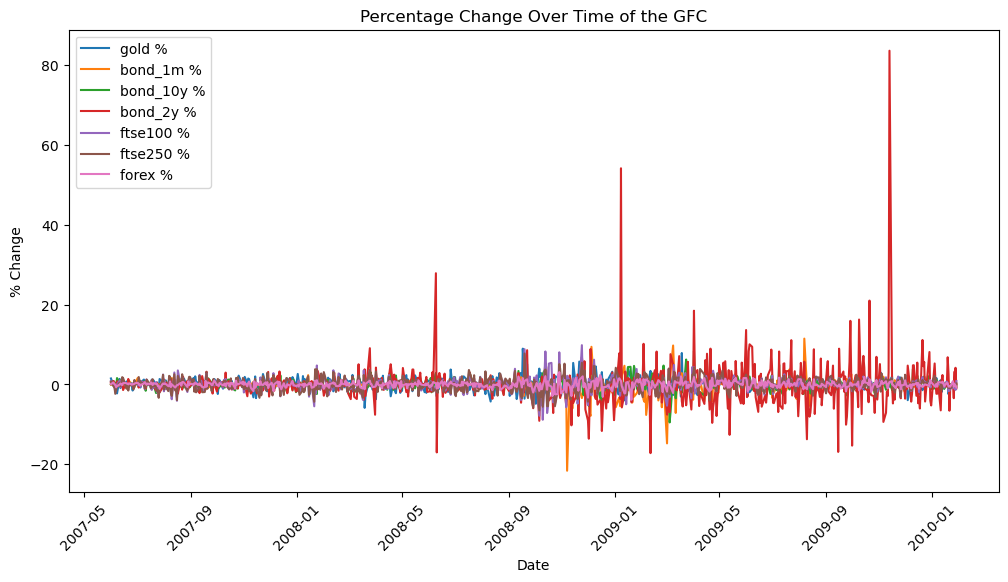

In [15]:
# Set the figure size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plt.plot(daily_change_gfc['date'], daily_change_gfc.drop(columns=['date']))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('% Change')
plt.title('Percentage Change Over Time of the GFC')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(daily_change_gfc.drop(columns=['date']).columns)

# Show plot
plt.show()

With such a long time frame and daily data then it's hard to tell much from this so a smaller time frame is needed.
I decided on the last 4 months of 2008 as there is a lot of movement in that period.

In [16]:
# Create a dataframe for Sep - Dec 2008
daily_change_08 = daily_change[daily_change['date'].between('2008-09-01', '2008-12-31')]
                                                  
# View the dataframe
daily_change_08                                              

,date,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
2450,2008-09-01,0.000000,-0.293427,-0.401875,-1.624388,-0.599657,0.295255,-1.136488
2451,2008-09-02,-2.874251,-0.137336,0.963909,0.655960,0.319490,1.425151,-1.027378
2452,2008-09-03,-0.369914,0.039293,-0.111012,-0.696629,-2.152757,-1.822157,-0.426439
2453,2008-09-04,-0.618812,0.098193,-0.911314,-0.497850,-2.501956,-2.344794,-0.884706
2454,2008-09-05,0.000000,0.000000,-1.704800,-1.614737,-2.264036,-2.002188,0.403661
...,...,...,...,...,...,...,...,...
2532,2008-12-23,-1.062574,-1.913043,-0.256000,-0.918964,0.160026,0.908290,-0.431325
2533,2008-12-24,1.193317,-0.709220,-2.245749,-4.468803,-0.925750,0.440510,-0.162448
2534,2008-12-29,3.183962,-2.083333,1.673777,3.000883,2.437979,0.551004,-1.742373
2535,2008-12-30,-0.571429,-2.310030,0.096837,-4.284490,1.697002,1.584104,-0.379494


Lets have a look at how the market indicators have moved over the final 4 months of 2008 and how the speech sentiment was.

In [17]:
# Filter the speeches dataframe from Sep 1st to Dec 25th
speeches_08 = speeches[(speeches['date'] >= '2008-09-01') & (speeches['date'] <= '2008-12-25')]

# View the dataframe
speeches_08

,date,author,is_gov,vader_polarity,lm_polarity,finbert_polarity
305,2008-09-12,Tucker,False,0.9963,-0.465116,-0.101861
306,2008-09-18,No_Info,False,0.9970,-0.491525,-0.297006
307,2008-09-22,Gieve,False,0.9993,-0.422535,-0.182742
308,2008-09-24,Sentance,False,0.9987,-0.376471,-0.197890
309,2008-09-25,Barker,False,-0.9706,-0.446154,-0.311320
310,2008-10-13,Sentance,False,-0.9970,-0.681592,-0.686063
311,2008-10-21,King,True,-0.9673,-0.671642,-0.529721
312,2008-10-28,Besley,False,0.9998,-0.263158,-0.306998
313,2008-10-28,Gieve,False,0.9887,-0.530864,-0.275880
314,2008-10-29,Blanchflower,False,0.9980,-0.510086,-0.591367


Only one speech from the Governor Mervyn King in this time frame.

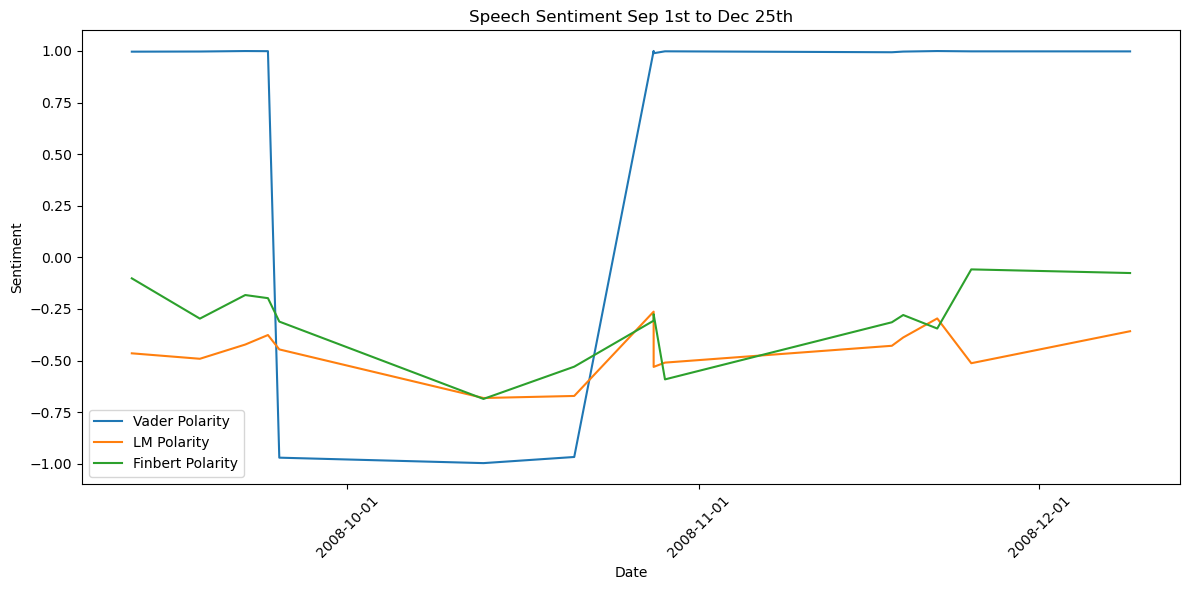

In [18]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot each column as a separate line
plt.plot(speeches_08['date'], speeches_08['vader_polarity'], label='Vader Polarity')
plt.plot(speeches_08['date'], speeches_08['lm_polarity'], label='LM Polarity')
plt.plot(speeches_08['date'], speeches_08['finbert_polarity'], label='Finbert Polarity')

# Set the title and labels
plt.title('Speech Sentiment Sep 1st to Dec 25th')
plt.xlabel('Date')
plt.ylabel('Sentiment')

# Rotate x-axis
plt.xticks(rotation=45)

# Set the x-axis ticks to display every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Format the date ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add a legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

The speeches are especially variable in the Vader scores, it seems it's either very positive or very negative. Finbert and LM are loosely aligned but do not display much positive sentiment compared to Vader. Note: 28-10-2008 there is in bold as there were 2 speeches.

Will plot the 2 together and see if there are any correlations between the spikes and speeches. The 4 months 

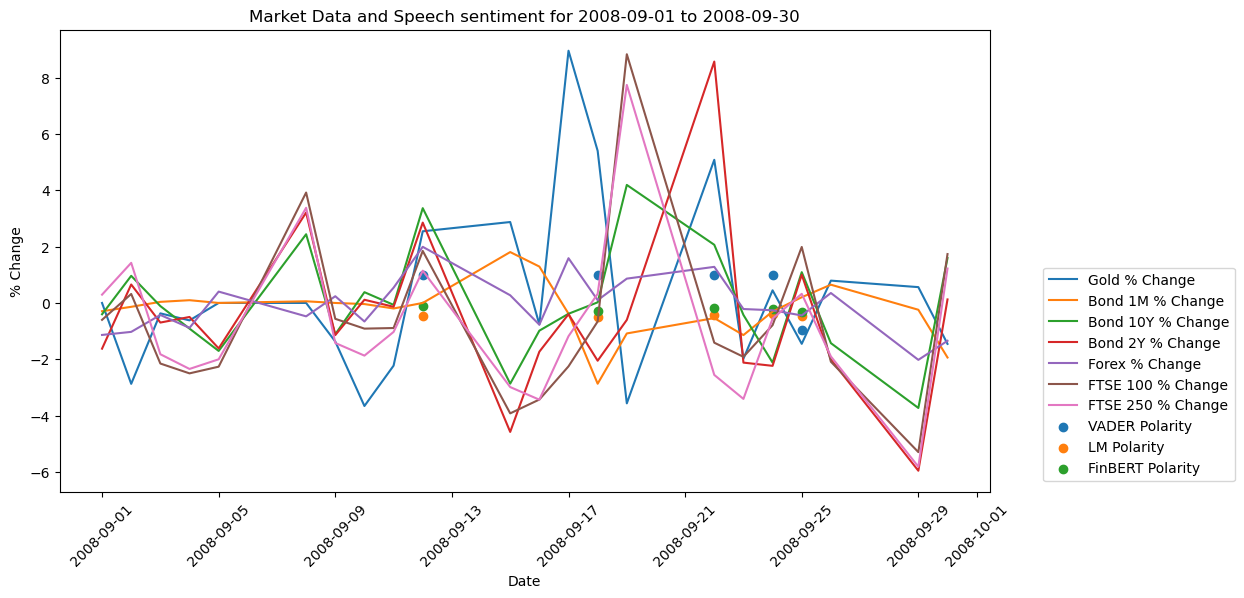

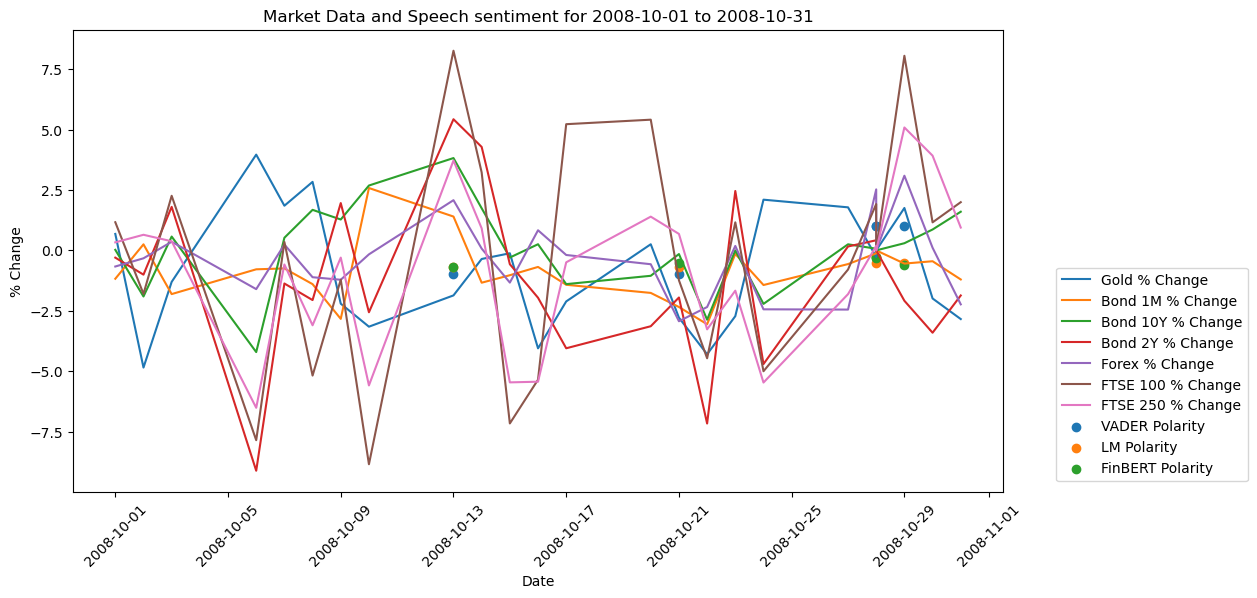

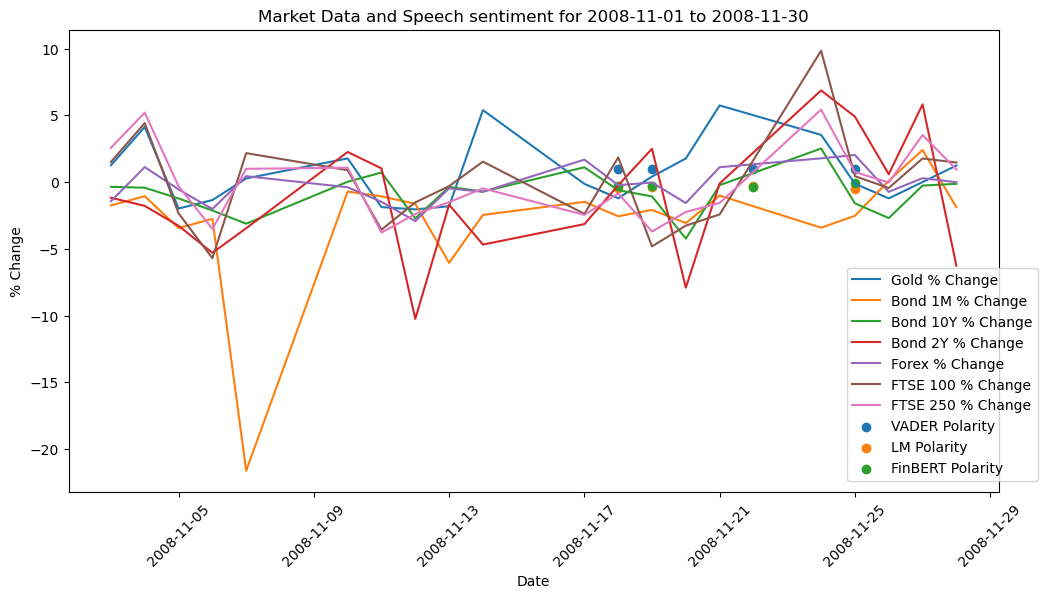

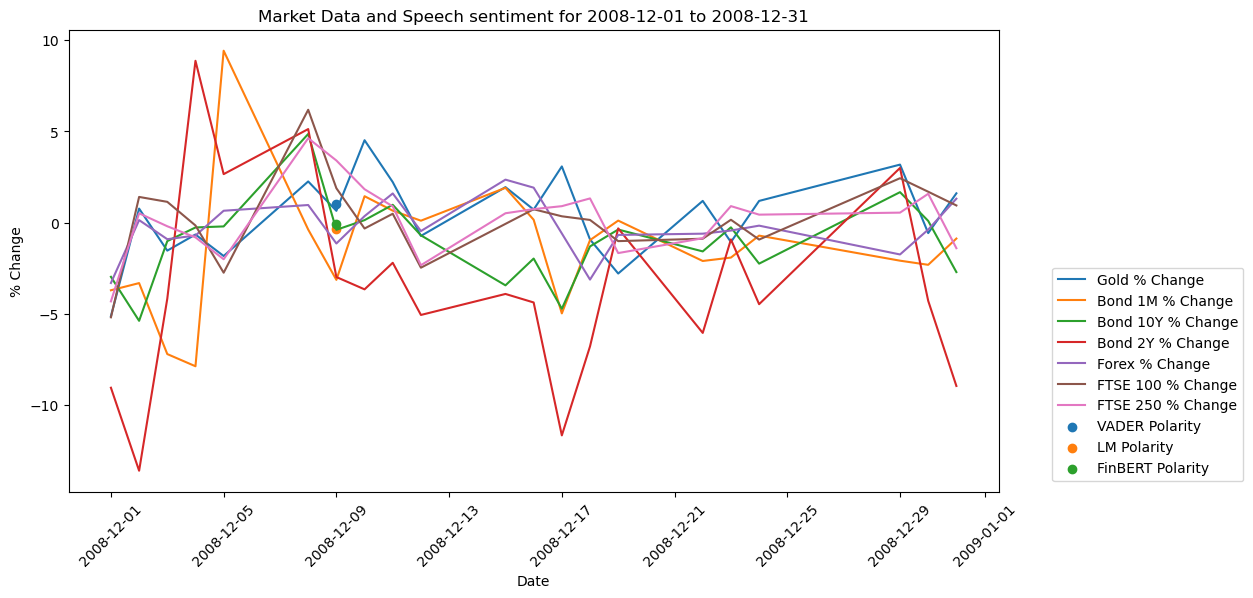

In [19]:
# Create a function to plot the market indicators with the speech dates and sentiment.
def plot_markets(start_date: str, end_date: str, df: pd.DataFrame, sentiment_df: pd.DataFrame) -> None:
    """
    Plot market data for a given date range with date on the x-axis and % change on the y-axis.

    :param start_date: Start date for the date range.
    :param end_date: End date for the date range.
    :param df: DataFrame containing market data.
    :param sentiment_df: DataFrame containing sentiment scores.
    :return: None
    """

    # Subset data by date range
    date_data = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

    # Sort data by date in ascending order
    date_data = date_data.sort_values(by="date")

    # Plot % change on y-axis
    plt.figure(figsize=(12, 6))
    plt.plot(date_data["date"], date_data["gold %"], label="Gold % Change")
    plt.plot(date_data["date"], date_data["bond_1m %"], label="Bond 1M % Change")
    plt.plot(date_data["date"], date_data["bond_10y %"], label="Bond 10Y % Change")
    plt.plot(date_data["date"], date_data["bond_2y %"], label="Bond 2Y % Change")
    plt.plot(date_data["date"], date_data["forex %"], label="Forex % Change")
    plt.plot(date_data["date"], date_data["ftse100 %"], label="FTSE 100 % Change")
    plt.plot(date_data["date"], date_data["ftse250 %"], label="FTSE 250 % Change")

    # Subset sentiment data by date range
    sentiment_data = sentiment_df[(sentiment_df["date"] >= start_date) & (sentiment_df["date"] <= end_date)]

    # Plot sentiment scores as scatter dots
    plt.scatter(sentiment_data["date"], sentiment_data["vader_polarity"], label="VADER Polarity")
    plt.scatter(sentiment_data["date"], sentiment_data["lm_polarity"], label="LM Polarity")
    plt.scatter(sentiment_data["date"], sentiment_data["finbert_polarity"], label="FinBERT Polarity")

    # Set x and y labels
    plt.xlabel("Date")
    plt.ylabel("% Change")

    # Set title
    plt.title(f"Market Data and Speech sentiment for {start_date} to {end_date}")

    # Rotate x-tick labels
    plt.xticks(rotation=45)

    # Show the plot legend
    plt.legend(bbox_to_anchor=(1.05, 0.5))

    # Show the plot
    plt.show()

plot_markets("2008-09-01", "2008-09-30", daily_change_08, speeches_08)
plot_markets("2008-10-01", "2008-10-31", daily_change_08, speeches_08)
plot_markets("2008-11-01", "2008-11-30", daily_change_08, speeches_08)
plot_markets("2008-12-01", "2008-12-31", daily_change_08, speeches_08)

There does seem to be spikes around the speeches consistently. But also lots of movements when there are no speeches.

A quick look at movement around Marvyn Kings only speech

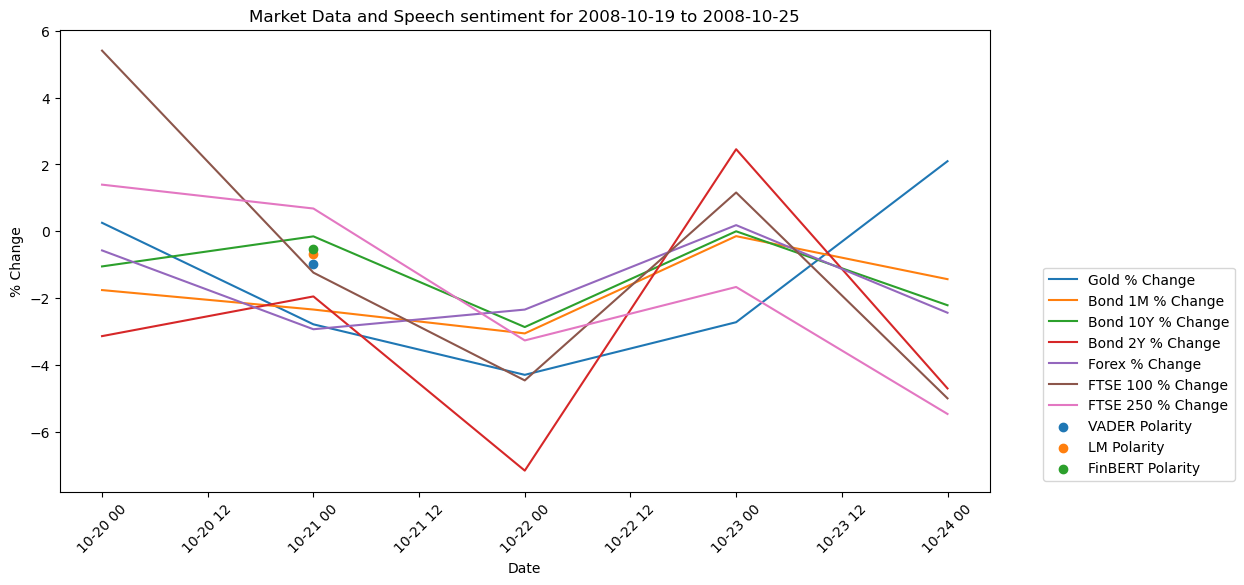

In [20]:
# Plot the week of Mervyn Kings speech
plot_markets("2008-10-19", "2008-10-25", daily_change_08, speeches_08)

A definitive drop in the markets after his speech which was notably negative even with the vader score which is not common.

And also a look at Andrew Sentence's speech 

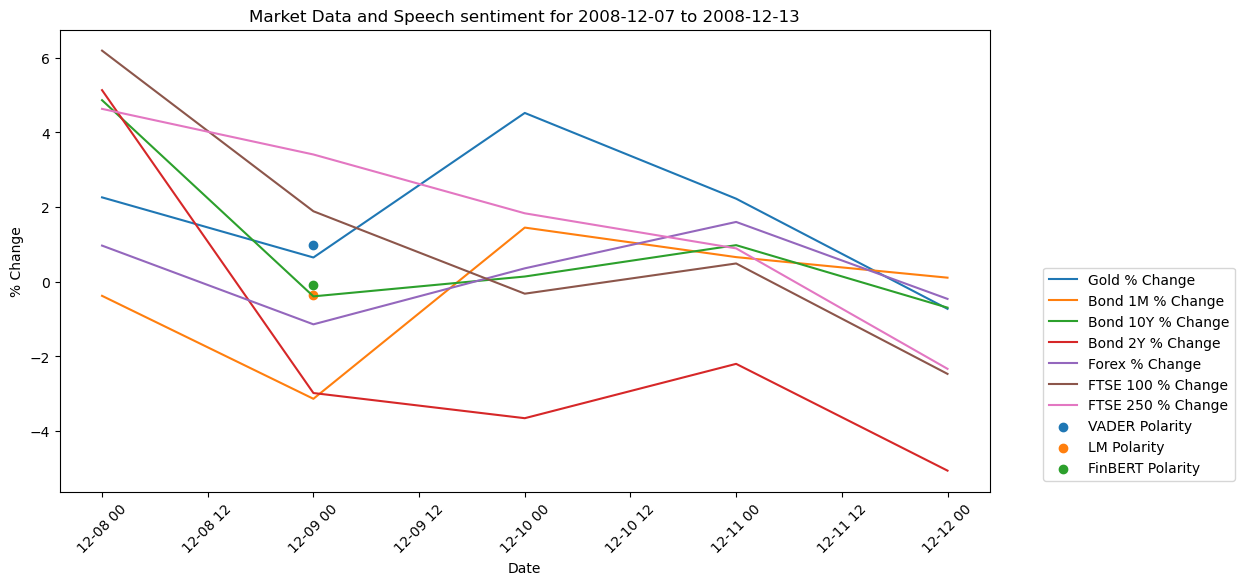

In [21]:
# Plot the week of Andrew Sentence's speech
plot_markets("2008-12-07", "2008-12-13", daily_change_08, speeches_08)

Will look into the Governor speeches as a whole as it will be interesting to see their effect solely before taking a broader look at all speeches.

In [22]:
# Filter rows where is_gov is True
gov = speeches[speeches['is_gov'] == True]

# Remove the is_gov column
gov = gov.drop(columns=['is_gov'])

# View the DataFrame
gov

,date,author,vader_polarity,lm_polarity,finbert_polarity
10,1999-05-17,King,0.9999,-0.181395,0.078723
18,1999-08-27,King,1.0000,-0.344000,-0.002053
19,1999-09-09,King,0.9986,-0.331429,-0.032255
22,1999-10-11,King,0.9997,-0.135484,-0.046509
31,2000-01-07,King,0.9997,-0.324138,-0.002200
...,...,...,...,...,...
1150,2022-02-10,Bailey,0.9981,-0.205479,0.685081
1166,2022-05-23,Bailey,-0.9771,-0.565217,-0.026249
1177,2022-07-12,Bailey,0.9998,-0.051948,-0.004046
1181,2022-07-19,Bailey,0.9789,-0.619048,-0.032983


188 speeches in the whole dataframe by governors, not a great amount each year at circa 8.

Makes me wonder how many of those are negative as the Mervyn King speech above was on 21-08-2008

In [23]:
# Create Dataframe with all negative Governor speeches
neg_gov = gov[(gov["vader_polarity"] <= 0) & (gov["lm_polarity"] <= 0) & (gov["finbert_polarity"] <= 0)]

# View the data frame
neg_gov

,date,author,vader_polarity,lm_polarity,finbert_polarity
183,2004-12-01,King,-0.9853,-0.265116,-0.003149
311,2008-10-21,King,-0.9673,-0.671642,-0.529721
356,2009-10-20,King,-0.4548,-0.441860,-0.220575
427,2011-03-17,Bailey,-0.9933,-0.314685,-0.227303
505,2012-05-02,King,-0.9989,-0.502959,-0.253631
509,2012-05-24,Bailey,-0.8651,-0.417722,-0.484257
540,2012-11-07,Bailey,-0.7131,-0.582418,-0.251665
672,2014-12-04,Bailey,-0.9926,-0.546296,-0.164077
775,2016-03-09,Bailey,-0.9974,-0.428571,-0.012757
798,2016-06-30,Carney,-0.9900,-0.263736,-0.451044


Only 11 speeches in total by Governors that all score poorly for sentiment. None others for the time frame I'm looking into but considering the time frame of 24 years and the shocks to the financial systems during that time then that is very low.

So as noted earlier, various plots were made and there seemed to be movement in the markets at the time of negative speeches, but at any given time the markets were also moving, this was seen among positive speeches also. Giving the impression that the speeches have no bearing on the markets.

When looking into the positive speeches notably, there are no positive speeches in the time frame of the GFC which is not a surprise, but a total of 45 in total for the whole 1998 to 2022, approximately 25% of all the Governor's speeches is quite low and alludes to the fact that many of the LM and FinBERT scores are below 0 even when Vader is in the positive range.

In total through all the 1195 speeches there are only 71 with all sentiment scores below 0 and solely negative, whilst 179 have all their sentiment scores above 0 and wholey positive.

This makes me question the validity of the Vader scores and why they are so positive. Conversely, it also raises questions about why the LM and FinBERT scores are so negative. Given that LM and FinBERT are more financial tools, while Vader is more aligned with normal life, could this create a happy medium? Are there less positive words within the financial realms of LM and FinBERT?

One thing to note is that the bond market certainly has dramatic movements both positive and negative.
It seems that Gold and the FTSE are more reactive in negative sentiment times than when it's positive.

After more plots, it continued to confirm most speeches do result in spikes, but there are often times with no speeches and spikes also. Enough to consider if Fed speeches or ECB speeches happened then? I'm not sure time will allow us to analyse their correlation. 

Because Bonds seem to fluctuate in larger amounts I then opted to plot them separate from the other markets in hope of more defined viewing.

In [24]:
# Create a function to plot bonds seperately from the other indicators
def plot_markets2(start_date: str, end_date: str, df: pd.DataFrame, sentiment_df: pd.DataFrame) -> None:
    """
    Plot market data for a given date range with date on the x-axis and % change on the y-axis.

    :param start_date: Start date for the date range.
    :param end_date: End date for the date range.
    :param df: DataFrame containing market data.
    :param sentiment_df: DataFrame containing sentiment scores.
    :return: None
    """

    # Subset data by date range
    date_data = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

    # Sort data by date in ascending order
    date_data = date_data.sort_values(by="date")

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 6))

    # Plot % change for bonds on y-axis for the first subplot
    ax1.plot(date_data["date"], date_data["bond_1m %"], label="Bond 1M % Change")
    ax1.plot(date_data["date"], date_data["bond_10y %"], label="Bond 10Y % Change")
    ax1.plot(date_data["date"], date_data["bond_2y %"], label="Bond 2Y % Change")

    # Plot sentiment scores as scatter dots for the first subplot
    sentiment_data = sentiment_df[(sentiment_df["date"] >= start_date) & (sentiment_df["date"] <= end_date)]
    ax1.scatter(sentiment_data["date"], sentiment_data["vader_polarity"], label="VADER Polarity")
    ax1.scatter(sentiment_data["date"], sentiment_data["lm_polarity"], label="LM Polarity")
    ax1.scatter(sentiment_data["date"], sentiment_data["finbert_polarity"], label="FinBERT Polarity")

    # Set x and y labels for the first subplot
    # Remove x-ticker labels and title for the first subplot
    ax1.set_ylabel("% Change")
    ax1.set_xlabel("")
    plt.setp(ax1.get_xticklabels(), visible=False)
    

    # Set title for the first subplot
    ax1.set_title(f"Speech sentiment for {start_date} to {end_date}\n against Bonds")

    # Rotate x-tick labels for the first subplot
    plt.setp(ax1.get_xticklabels(), rotation=45)

    # Plot % change for other markets on y-axis for the second subplot
    ax2.plot(date_data["date"], date_data["gold %"], label="Gold % Change")
    ax2.plot(date_data["date"], date_data["forex %"], label="Forex % Change")
    ax2.plot(date_data["date"], date_data["ftse100 %"], label="FTSE 100 % Change")
    ax2.plot(date_data["date"], date_data["ftse250 %"], label="FTSE 250 % Change")

    # Plot sentiment scores as scatter dots for the second subplot
    ax2.scatter(sentiment_data["date"], sentiment_data["vader_polarity"], label="VADER Polarity")
    ax2.scatter(sentiment_data["date"], sentiment_data["lm_polarity"], label="LM Polarity")
    ax2.scatter(sentiment_data["date"], sentiment_data["finbert_polarity"], label="FinBERT Polarity")

    # Set x and y labels for the second subplot
    ax2.set_xlabel("Date")
    ax2.set_ylabel("% Change")

    # Set title for the second subplot
    ax2.set_title(f"Speech sentiment for {start_date} to {end_date}\n against Other Markets")

    # Rotate x-tick labels for the second subplot
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

    # Show the plot legend
    ax1.legend(bbox_to_anchor=(1.05, 0.5))
    ax2.legend(bbox_to_anchor=(1.05, 0.5))

    # Show the plot
    plt.show()

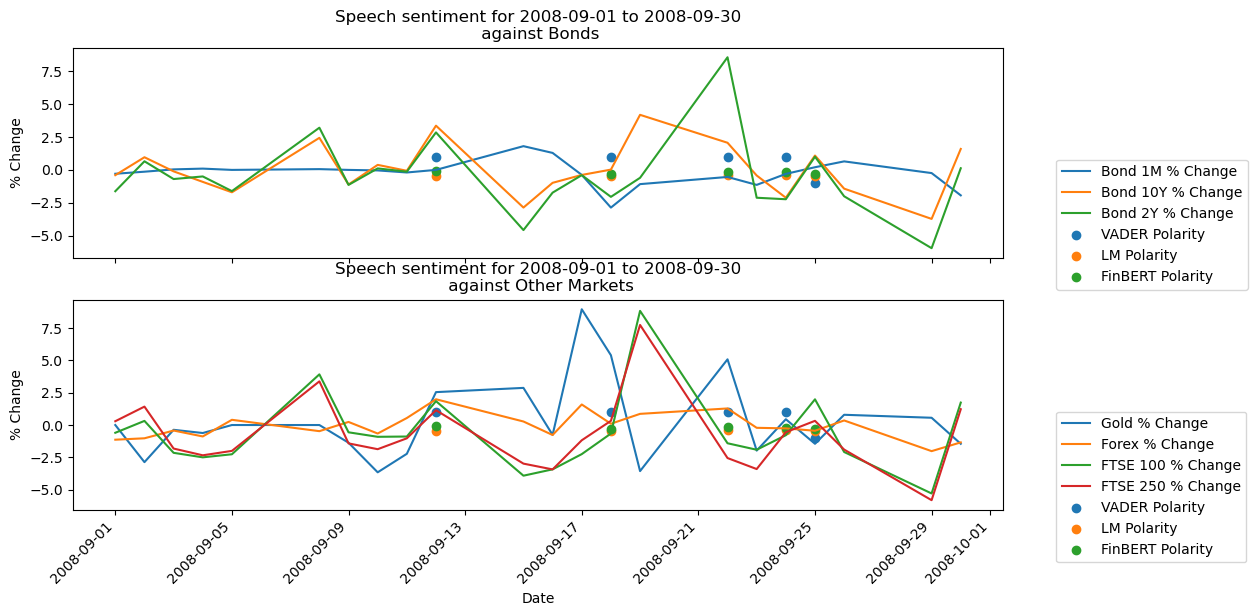

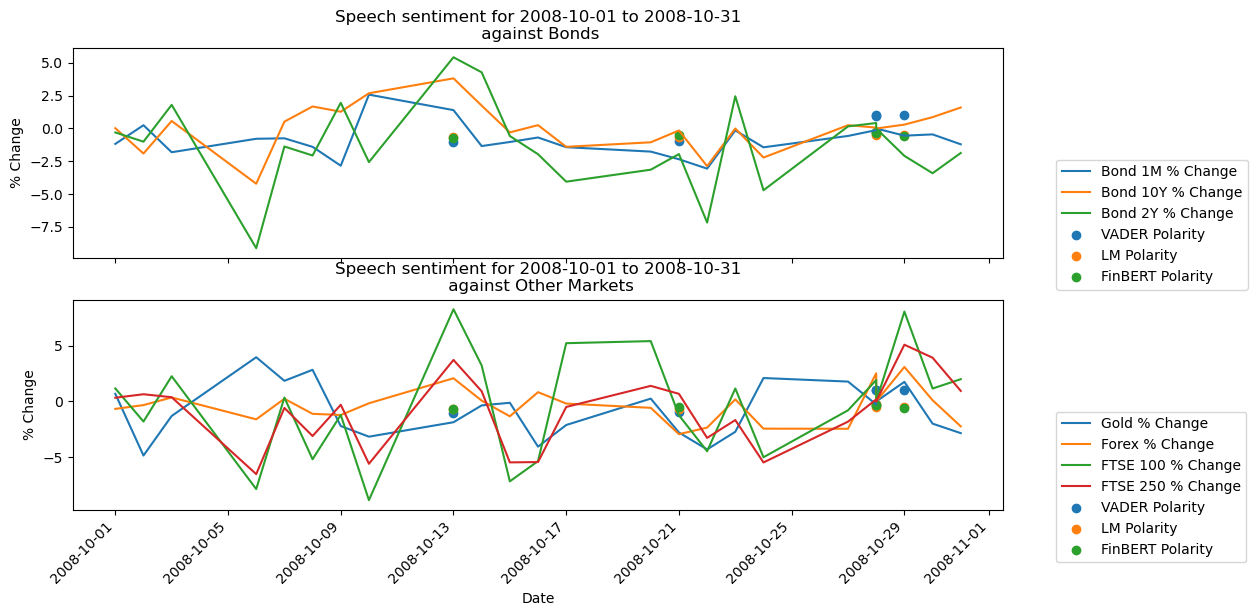

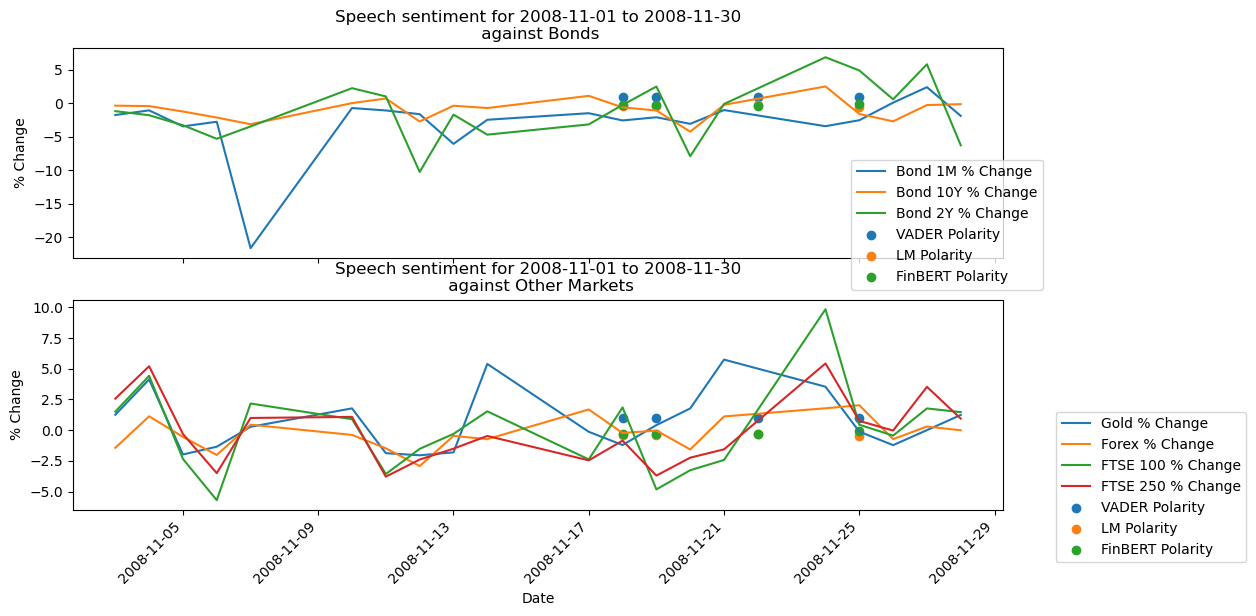

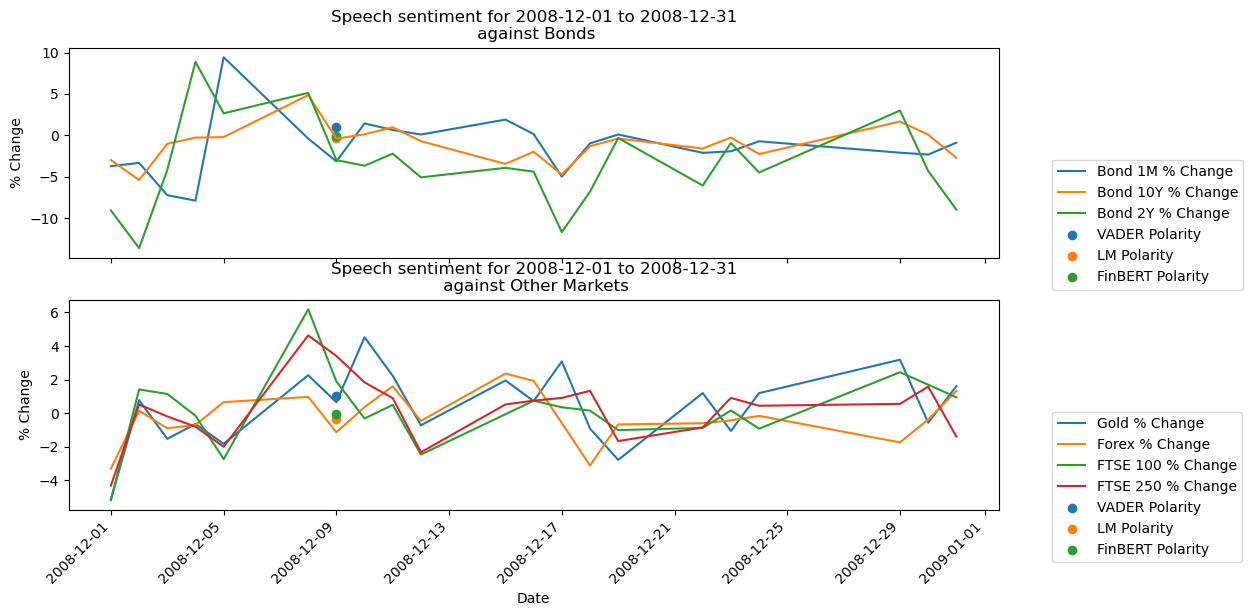

In [25]:
# Plot the last 4 months of 2008
plot_markets2("2008-09-01", "2008-09-30", daily_change, speeches)
plot_markets2("2008-10-01", "2008-10-31", daily_change, speeches)
plot_markets2("2008-11-01", "2008-11-30", daily_change, speeches)
plot_markets2("2008-12-01", "2008-12-31", daily_change, speeches)

## Conclusions
The markets do tend to fluctuate around the dates of speeches. Sentiment, whether extremely negative or positive, drives movements in the markets, with bonds being the most volatile. Additionally, during times of positive sentiment, fluctuations tend to be smaller compared to periods of negative sentiment. It should be noted that the markets also exhibit significant movement when no speeches occur, indicating that speeches alone are not the sole driving force behind market fluctuations.

Some interesting insights in this preliminary analysis will dig deeper after a look at GDP, CPI, Unemployment, and Wage growth.

All this initial analysis was done using all 3 NLP models, for future investigations it was decided to use solely FinBERT polarity scores only.

For the presentation, this plot was decided on due to Mervyn King making a speech that was the lowest by a Governor and also as it was within the GFC period. It served to highlight movement throughout the time frames. Also, FinBERT was the only NLP model used so the only one displayed. A marker was placed on it via PowerPoint to indicate King's speech on October 21st.

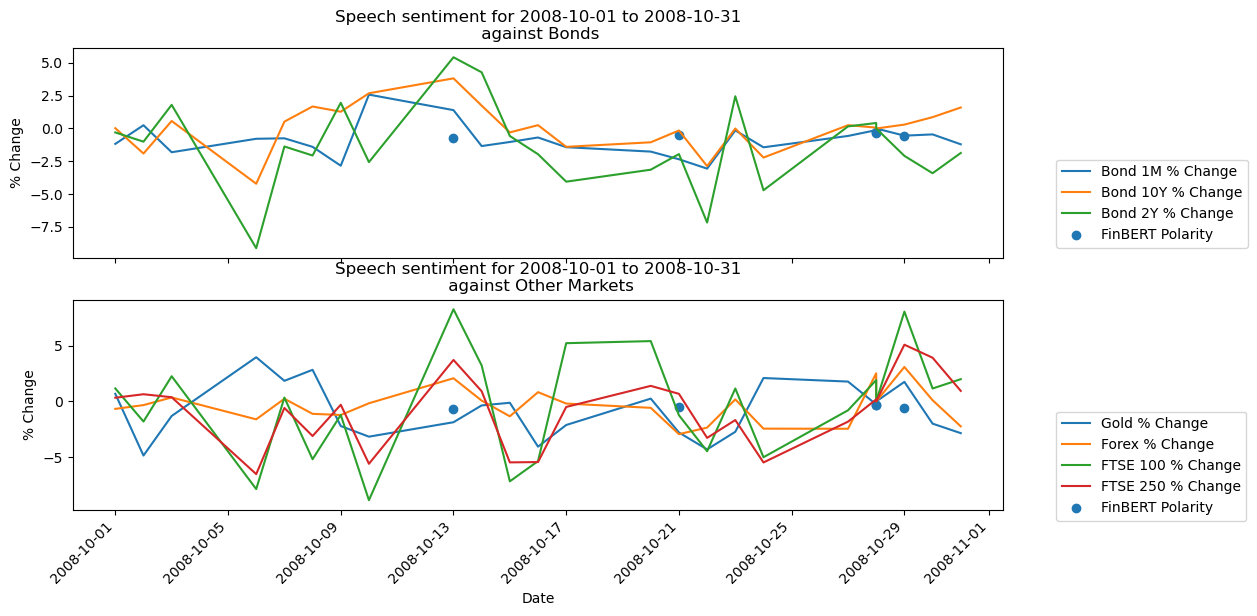

In [26]:
# Create a function to plot bonds seperately from the other indicators
def plot_markets2(start_date: str, end_date: str, df: pd.DataFrame, sentiment_df: pd.DataFrame) -> None:
    """
    Plot market data for a given date range with date on the x-axis and % change on the y-axis.

    :param start_date: Start date for the date range.
    :param end_date: End date for the date range.
    :param df: DataFrame containing market data.
    :param sentiment_df: DataFrame containing sentiment scores.
    :return: None
    """

    # Subset data by date range
    date_data = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

    # Sort data by date in ascending order
    date_data = date_data.sort_values(by="date")

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 6))

    # Plot % change for bonds on y-axis for the first subplot
    ax1.plot(date_data["date"], date_data["bond_1m %"], label="Bond 1M % Change")
    ax1.plot(date_data["date"], date_data["bond_10y %"], label="Bond 10Y % Change")
    ax1.plot(date_data["date"], date_data["bond_2y %"], label="Bond 2Y % Change")

    # Plot sentiment scores as scatter dots for the first subplot
    sentiment_data = sentiment_df[(sentiment_df["date"] >= start_date) & (sentiment_df["date"] <= end_date)]
    ax1.scatter(sentiment_data["date"], sentiment_data["finbert_polarity"], label="FinBERT Polarity")

    # Set x and y labels for the first subplot
    # Remove x-ticker labels and title for the first subplot
    ax1.set_ylabel("% Change")
    ax1.set_xlabel("")
    plt.setp(ax1.get_xticklabels(), visible=False)
    

    # Set title for the first subplot
    ax1.set_title(f"Speech sentiment for {start_date} to {end_date}\n against Bonds")

    # Rotate x-tick labels for the first subplot
    plt.setp(ax1.get_xticklabels(), rotation=45)

    # Plot % change for other markets on y-axis for the second subplot
    ax2.plot(date_data["date"], date_data["gold %"], label="Gold % Change")
    ax2.plot(date_data["date"], date_data["forex %"], label="Forex % Change")
    ax2.plot(date_data["date"], date_data["ftse100 %"], label="FTSE 100 % Change")
    ax2.plot(date_data["date"], date_data["ftse250 %"], label="FTSE 250 % Change")

    # Plot sentiment scores as scatter dots for the second subplot
    ax2.scatter(sentiment_data["date"], sentiment_data["finbert_polarity"], label="FinBERT Polarity")

    # Set x and y labels for the second subplot
    ax2.set_xlabel("Date")
    ax2.set_ylabel("% Change")

    # Set title for the second subplot
    ax2.set_title(f"Speech sentiment for {start_date} to {end_date}\n against Other Markets")

    # Rotate x-tick labels for the second subplot
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

    # Show the plot legend
    ax1.legend(bbox_to_anchor=(1.05, 0.5))
    ax2.legend(bbox_to_anchor=(1.05, 0.5))

    # Show the plot
    plt.show()

# Month of Mervyn Kings low scoring speech in the GFC
plot_markets2("2008-10-01", "2008-10-31", daily_change, speeches)

# Additional analysis

Firstly, with around 1200 speeches then I'd like to look at the Governor's speeches solely and now that we have decided on FinBERT as the NLP model we are using drop the other 2 models from the analysis.

In [27]:
# Convert to datetime
gov['date'] = pd.to_datetime(gov['date'])

# Drop LM and Vader
gov = gov.loc[:, ['date', 'finbert_polarity']]

# Drop years prior to 1999
gov = gov[(gov['date'] >= '1999-01-01') & (gov['date'] <= '2022-10-20')]

# View the dataframe
gov

,date,finbert_polarity
10,1999-05-17,0.078723
18,1999-08-27,-0.002053
19,1999-09-09,-0.032255
22,1999-10-11,-0.046509
31,2000-01-07,-0.002200
...,...,...
1150,2022-02-10,0.685081
1166,2022-05-23,-0.026249
1177,2022-07-12,-0.004046
1181,2022-07-19,-0.032983


In [28]:
# Merge 'gov' DataFrame with 'daily_change' DataFrame based on date
speech_day = pd.merge(gov, daily_change, on='date', how='inner')

# View the dataframe
speech_day

,date,finbert_polarity,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
0,1999-05-17,0.078723,-0.361011,0.000000,0.187110,2.789088,-2.136374,-1.082655,-0.092650
1,1999-08-27,-0.002053,0.393701,0.000000,1.296915,0.406864,-0.136276,0.120718,0.063012
2,1999-09-09,-0.032255,0.389105,0.000000,-0.072701,3.536481,0.111936,-0.236781,0.969555
3,1999-10-11,-0.046509,-0.621118,0.000000,0.017599,-0.855805,0.571021,-0.234269,0.030257
4,2000-01-07,-0.002200,0.354610,0.000000,-0.972729,-0.030451,0.893405,1.212788,-0.491863
...,...,...,...,...,...,...,...,...,...
204,2022-02-10,0.685081,0.000000,-5.977011,7.053073,4.806202,0.379412,0.107288,0.169967
205,2022-05-23,-0.026249,0.325733,1.378579,4.285714,4.183267,1.669823,1.563819,0.808841
206,2022-07-12,-0.004046,-0.404157,-2.684564,-5.321101,-3.882979,0.184807,0.095557,-0.033645
207,2022-07-12,-0.004046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
# Drop rows with duplicate 'finbert_polarity' scores and 'date', keeping the first occurrence
speech_day = speech_day.drop_duplicates(subset=['finbert_polarity', 'date'], keep='first')

# View the dataframe
speech_day

,date,finbert_polarity,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
0,1999-05-17,0.078723,-0.361011,0.000000,0.187110,2.789088,-2.136374,-1.082655,-0.092650
1,1999-08-27,-0.002053,0.393701,0.000000,1.296915,0.406864,-0.136276,0.120718,0.063012
2,1999-09-09,-0.032255,0.389105,0.000000,-0.072701,3.536481,0.111936,-0.236781,0.969555
3,1999-10-11,-0.046509,-0.621118,0.000000,0.017599,-0.855805,0.571021,-0.234269,0.030257
4,2000-01-07,-0.002200,0.354610,0.000000,-0.972729,-0.030451,0.893405,1.212788,-0.491863
...,...,...,...,...,...,...,...,...,...
203,2021-09-27,-0.159087,0.000000,133.333333,3.904555,2.088773,0.168757,-0.000852,0.095015
204,2022-02-10,0.685081,0.000000,-5.977011,7.053073,4.806202,0.379412,0.107288,0.169967
205,2022-05-23,-0.026249,0.325733,1.378579,4.285714,4.183267,1.669823,1.563819,0.808841
206,2022-07-12,-0.004046,-0.404157,-2.684564,-5.321101,-3.882979,0.184807,0.095557,-0.033645


So now to explore the data on the day of each Governor speech.

In [30]:
# Calculate average and sum
average_change = speech_day[['gold %', 'bond_1m %', 'bond_10y %', 'bond_2y %', 'ftse100 %', 'ftse250 %', 'forex %']].mean(axis=1)
sum_change = speech_day[['gold %', 'bond_1m %', 'bond_10y %', 'bond_2y %', 'ftse100 %', 'ftse250 %', 'forex %']].sum(axis=1)
average_change_bonds = speech_day[['bond_1m %', 'bond_10y %', 'bond_2y %']].mean(axis=1)

# Add new columns to the DataFrame
speech_day['average_change'] = average_change
speech_day['sum_change'] = sum_change
speech_day['average_change_bonds'] = average_change_bonds

# View the dataframe
speech_day

,date,finbert_polarity,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %,average_change,sum_change,average_change_bonds
0,1999-05-17,0.078723,-0.361011,0.000000,0.187110,2.789088,-2.136374,-1.082655,-0.092650,-0.099499,-0.696491,0.992066
1,1999-08-27,-0.002053,0.393701,0.000000,1.296915,0.406864,-0.136276,0.120718,0.063012,0.306419,2.144933,0.567926
2,1999-09-09,-0.032255,0.389105,0.000000,-0.072701,3.536481,0.111936,-0.236781,0.969555,0.671085,4.697594,1.154593
3,1999-10-11,-0.046509,-0.621118,0.000000,0.017599,-0.855805,0.571021,-0.234269,0.030257,-0.156045,-1.092314,-0.279402
4,2000-01-07,-0.002200,0.354610,0.000000,-0.972729,-0.030451,0.893405,1.212788,-0.491863,0.137966,0.965761,-0.334393
...,...,...,...,...,...,...,...,...,...,...,...,...
203,2021-09-27,-0.159087,0.000000,133.333333,3.904555,2.088773,0.168757,-0.000852,0.095015,19.941369,139.589582,46.442220
204,2022-02-10,0.685081,0.000000,-5.977011,7.053073,4.806202,0.379412,0.107288,0.169967,0.934133,6.538931,1.960754
205,2022-05-23,-0.026249,0.325733,1.378579,4.285714,4.183267,1.669823,1.563819,0.808841,2.030825,14.215776,3.282520
206,2022-07-12,-0.004046,-0.404157,-2.684564,-5.321101,-3.882979,0.184807,0.095557,-0.033645,-1.720869,-12.046082,-3.962881


Highest and lowest scoring speeches were looked into to see if anything stood out for movements when the speech was made.

Again, it seemed the markets are moving either side of zero for both the negative and positive Governor speeches.

A look at the markets and their average movements on the day of the speeches for the highest and lowest FinBERT scores as well as for all the speeches showed some more movements in the bond markets but nothing that was deemed worthy to include in the presentation other than this. 

The day before and after were also looked into to see if there was any correaltion.

This also has not shown anyting significant other than bonds tend to be more volatile than the other markets which was already a known fact.

After looking at the Governor's speeches and finding nothing of great interest plotting the movements over time and then collating the average changes for each market. I then wanted to see if this changed for all the speeches. In mind was also the fact that bonds can swing a great deal and averages may not be the best way to view them.

So, the next move was to look at all the speeches made now, governors included in case something was to be seen in them. Again it was inconclusive.

This confirmed the bond movement trend of larger swings than the other markets but also the limitations of this analysis using averages as one large swing which often happens with bonds could skew the data.

This prompted a need to look at the movement around speeches on a more granular level and I started with the highest and lowest 10 Governor speeches as well as 20 of all speeches. 

This again, for the negative speeches showed the markets are going either way regardless of the sentiment.

After looking at the positive speeches too it confirmed that the day of a speech the markets are moving in various directions regardless of the sentiment of the speech on the day. 

Now a look at the count of the positive and negative movements for each market on the day of the Governor's speech grouped by either negative or positive FinBERT scores.

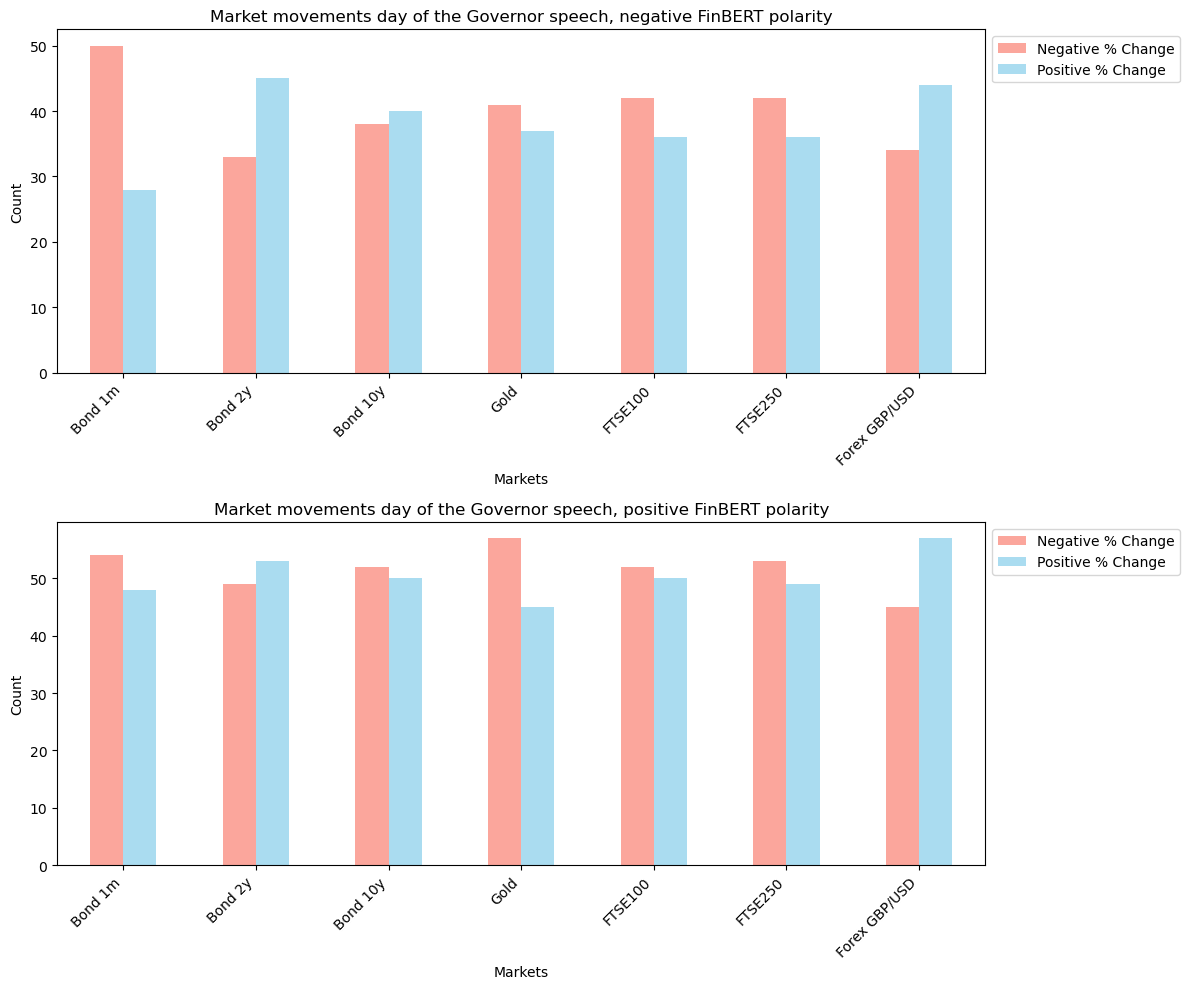

In [31]:
# Define the columns of interest
columns_of_interest = ['bond_1m %', 'bond_2y %', 'bond_10y %', 'gold %', 'ftse100 %', 'ftse250 %', 'forex %']
column_labels = ['Bond 1m', 'Bond 2y', 'Bond 10y', 'Gold', 'FTSE100', 'FTSE250', 'Forex GBP/USD']

# Create a new DataFrame with the counts of positive and negative values for each column
negative_polarity_counts = speech_day.loc[speech_day['finbert_polarity'] < 0, columns_of_interest].apply(lambda x: (x < 0).value_counts())
positive_polarity_counts = speech_day.loc[speech_day['finbert_polarity'] >= 0, columns_of_interest].apply(lambda x: (x < 0).value_counts())

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot for values below 0
negative_polarity_counts.T.plot(kind='bar', ax=axes[0], color=['salmon', 'skyblue'], alpha=0.7)
axes[0].set_title('Market movements day of the Governor speech, negative FinBERT polarity')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Markets')
axes[0].set_xticklabels(column_labels, rotation=45, ha='right')

# Plot for values above 0
positive_polarity_counts.T.plot(kind='bar', ax=axes[1], color=['salmon', 'skyblue'], alpha=0.7)
axes[1].set_title('Market movements day of the Governor speech, positive FinBERT polarity')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Markets')
axes[1].set_xticklabels(column_labels, rotation=45, ha='right')

# Set legend outside the plot
axes[0].legend(['Negative % Change', 'Positive % Change'], loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(['Negative % Change', 'Positive % Change'], loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

The most interesting thing from looking into the day of the Governor's speeches is the movement of 1-month bonds on the day of a negative speech. This is in line with what could be expected in times of negative sentiment when investors are searching for safe-haven assets.

The GFC I will look into now to take a closer look at a time of significance. I will combine all the speeches with the changes in the markets on the day it was taken.

In [32]:
# Check my dataframe from above
daily_change_gfc

,date,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
2133,2007-06-01,1.499250,-0.089960,0.076526,0.385559,0.833651,0.706795,0.070682
2134,2007-06-04,-0.147710,0.090041,0.841139,0.837989,-0.188717,-0.502593,0.489380
2135,2007-06-05,-0.147929,0.125945,0.227488,0.277008,-0.469685,-0.570234,0.075309
2136,2007-06-06,0.000000,0.035939,0.416115,-0.552486,-1.659927,-2.352023,-0.045151
2137,2007-06-07,-1.481481,0.143704,-0.772273,-1.024306,-0.269828,-1.324862,-0.727766
...,...,...,...,...,...,...,...,...
2808,2010-01-26,0.182482,0.779727,-0.870456,-3.450980,0.315573,-0.002144,-0.603411
2809,2010-01-27,-1.183971,-0.967118,0.490702,3.249391,-1.125659,-0.512225,0.117698
2810,2010-01-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2811,2010-01-28,0.000000,0.000000,0.873811,4.169945,-1.376134,-0.340714,-0.228932


In [33]:
# Filter the DataFrame for dates between "2007-06-01" and "2010-01-31"
speeches_gfc = speeches[(speeches['date'] >= '2007-06-01') & (speeches['date'] <= '2010-01-31')]

# Remove 'author' and 'is_gov' columns
speeches_gfc = speeches_gfc.drop(['author', 'is_gov'], axis=1)

# View the dataframe
speeches_gfc

,date,vader_polarity,lm_polarity,finbert_polarity
260,2007-06-11,0.9995,-0.333333,0.136193
261,2007-06-15,0.9999,-0.029240,0.009835
262,2007-06-20,0.9995,-0.025000,0.443240
263,2007-06-26,1.0000,0.012987,-0.027039
264,2007-06-29,0.9997,-0.203762,0.156303
...,...,...,...,...
367,2009-12-16,0.9997,-0.427136,-0.002351
368,2010-01-19,0.9968,-0.397260,-0.241259
369,2010-01-21,0.9998,-0.525641,-0.111540
370,2010-01-27,-0.9951,-0.288660,0.192988


In [34]:
# Merge the speeches and daily movements on the day
speeches_gfc_day = pd.merge(speeches_gfc[['date', 'finbert_polarity']], daily_change, on='date', how='left')

# View the dataframe
speeches_gfc_day

,date,finbert_polarity,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
0,2007-06-11,0.136193,1.384615,-0.518598,0.504484,0.330722,0.959246,0.448051,-0.040607
1,2007-06-15,0.009835,0.457317,-0.179437,0.220183,-1.407242,1.240620,1.612297,0.319846
2,2007-06-20,0.443240,-0.751880,-0.071788,-0.712980,-0.470219,-0.013539,-0.166708,0.256513
3,2007-06-26,-0.027039,-1.526718,0.106063,-0.363108,-0.103770,-0.441687,-0.348099,0.050053
4,2007-06-29,0.156303,0.153846,0.493392,0.424041,0.506904,0.556969,0.072917,0.319537
...,...,...,...,...,...,...,...,...,...
115,2010-01-21,-0.111540,-0.898473,-0.388350,-2.493766,-6.583760,-1.580942,-0.572197,-0.515875
116,2010-01-27,0.192988,-1.183971,-0.967118,0.490702,3.249391,-1.125659,-0.512225,0.117698
117,2010-01-27,0.192988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
118,2010-01-27,-0.054856,-1.183971,-0.967118,0.490702,3.249391,-1.125659,-0.512225,0.117698


In [35]:
# Remove duplicates
speeches_gfc_day = speeches_gfc_day.drop_duplicates(subset=['date', 'finbert_polarity'])

# View the dataframe
speeches_gfc_day

,date,finbert_polarity,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
0,2007-06-11,0.136193,1.384615,-0.518598,0.504484,0.330722,0.959246,0.448051,-0.040607
1,2007-06-15,0.009835,0.457317,-0.179437,0.220183,-1.407242,1.240620,1.612297,0.319846
2,2007-06-20,0.443240,-0.751880,-0.071788,-0.712980,-0.470219,-0.013539,-0.166708,0.256513
3,2007-06-26,-0.027039,-1.526718,0.106063,-0.363108,-0.103770,-0.441687,-0.348099,0.050053
4,2007-06-29,0.156303,0.153846,0.493392,0.424041,0.506904,0.556969,0.072917,0.319537
...,...,...,...,...,...,...,...,...,...
113,2009-12-16,-0.002351,1.157614,1.443299,-0.845937,-4.717711,0.652692,1.268431,0.362475
114,2010-01-19,-0.241259,0.087719,0.000000,1.853262,6.805444,0.340350,-0.174457,0.232672
115,2010-01-21,-0.111540,-0.898473,-0.388350,-2.493766,-6.583760,-1.580942,-0.572197,-0.515875
116,2010-01-27,0.192988,-1.183971,-0.967118,0.490702,3.249391,-1.125659,-0.512225,0.117698


In [36]:
speeches_gfc_day.to_csv('speeches_gfc_day.csv', index=False)

So lets see how that visualises.

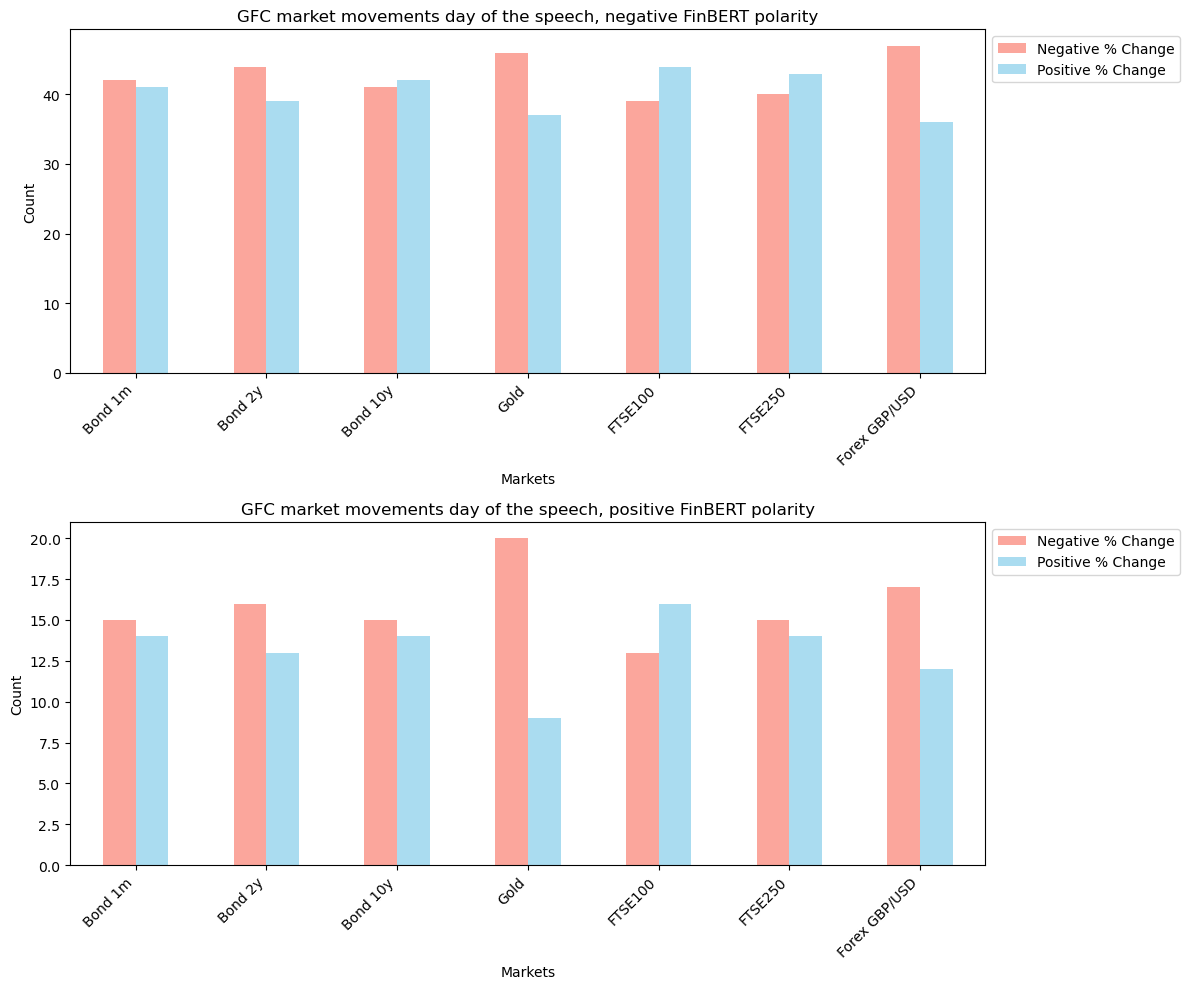

In [37]:
# Define the columns of interest
columns_of_interest = ['bond_1m %', 'bond_2y %', 'bond_10y %', 'gold %', 'ftse100 %', 'ftse250 %', 'forex %']
column_labels = ['Bond 1m', 'Bond 2y', 'Bond 10y', 'Gold', 'FTSE100', 'FTSE250', 'Forex GBP/USD']

# Create a new DataFrame with the counts of positive and negative values for each column
negative_polarity_counts = speeches_gfc_day.loc[speeches_gfc_day['finbert_polarity'] < 0, 
                                                columns_of_interest].apply(lambda x: (x < 0).value_counts())
positive_polarity_counts = speeches_gfc_day.loc[speeches_gfc_day['finbert_polarity'] >= 0, 
                                                columns_of_interest].apply(lambda x: (x < 0).value_counts())

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot for values below 0
negative_polarity_counts.T.plot(kind='bar', ax=axes[0], color=['salmon', 'skyblue'], alpha=0.7)
axes[0].set_title('GFC market movements day of the speech, negative FinBERT polarity')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Markets')
axes[0].set_xticklabels(column_labels, rotation=45, ha='right')

# Plot for values above 0
positive_polarity_counts.T.plot(kind='bar', ax=axes[1], color=['salmon', 'skyblue'], alpha=0.7)
axes[1].set_title('GFC market movements day of the speech, positive FinBERT polarity')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Markets')
axes[1].set_xticklabels(column_labels, rotation=45, ha='right')

# Set legend outside the plot
axes[0].legend(['Negative % Change', 'Positive % Change'], loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(['Negative % Change', 'Positive % Change'], loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

So during the GFC other than Gold then it's pretty even with days positive and negative quite even amongst all the markets.
Gold's negative movements during a positive speech is a stand-out correlation that can be expected when the economy is moving out of a negative period and into a positive era as Gold is sold having been the safe investment in negative times.

After looking at other periods this was the only significant finding as the markets again tended to move quite evenly and certainly didn't move negative in negative speech times or vice versa for positive times.

# Post assignmant 2 additional analysis

## MPC and FSR reports

The reports were all analysed using our FinBERT NLP model, now to see what can be found in comparison to speeches.

Firstly the MPC reports

In [38]:
# Import the mpc_finbert_scores_final.csv
mpc = pd.read_csv('mpc_finbert_scores_final.csv')

# View the dataframe
mpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  96 non-null     object 
 1   mpc_finbert_polarity  96 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [39]:
# Convert the date column to datetime
mpc['date'] = pd.to_datetime(mpc['date'])

# View the dataframe
mpc

,date,mpc_finbert_polarity
0,1999-02-10,-0.229519
1,1999-05-12,-0.073518
2,1999-08-11,0.136037
3,1999-11-10,0.129230
4,2000-02-17,0.197938
...,...,...
91,2021-11-04,-0.185102
92,2022-02-03,-0.071526
93,2022-05-05,-0.179852
94,2022-08-04,-0.148186


In [40]:
mpc.to_csv('mpc.csv', index=False)

In [41]:
# Merge the DataFrames on the 'date' column
mpc_daily = pd.merge(mpc, daily_change, on='date', how='left')

# Filter the DataFrame to include only dates between '1999-01-01' and '2022-10-31'
mpc_daily = mpc_daily[(mpc_daily['date'] >= '1999-01-01') & (mpc_daily['date'] <= '2022-10-31')]

# Drop duplicates from the 'mpc_finbert_polarity' column
mpc_daily.drop_duplicates(subset=['mpc_finbert_polarity'], inplace=True)

# View the dataframe
mpc_daily

,date,mpc_finbert_polarity,gold %,bond_1m %,bond_10y %,bond_2y %,ftse100 %,ftse250 %,forex %
0,1999-02-10,-0.229519,0.000000,0.000000,0.184459,0.270946,-0.167818,-0.384353,-0.677738
1,1999-05-12,-0.073518,-0.357143,0.000000,-1.091291,-0.374753,-0.551867,-0.736754,-0.357341
2,1999-08-11,0.136037,0.384615,0.833672,-0.520640,-0.802541,0.602168,-0.018563,-0.105263
3,1999-11-10,0.129230,2.040816,0.000000,0.233418,-0.865657,0.178696,0.329205,0.338733
4,2000-02-17,0.197938,-0.327869,0.000000,-0.546256,7.115796,1.006928,1.264899,-0.012432
...,...,...,...,...,...,...,...,...,...
91,2021-08-05,-0.018171,-0.330579,-350.000000,1.351351,30.000000,-0.049130,0.678441,0.309687
92,2021-11-04,-0.185102,1.700680,-37.142857,-12.115564,-29.587482,0.427651,1.531771,-1.359252
93,2022-02-03,-0.071526,-0.331492,29.893238,9.721116,11.047070,-0.714759,-1.265650,0.132577
94,2022-05-05,-0.179852,0.374532,37.500000,-0.101626,-5.221615,0.130777,-0.640471,-2.036289


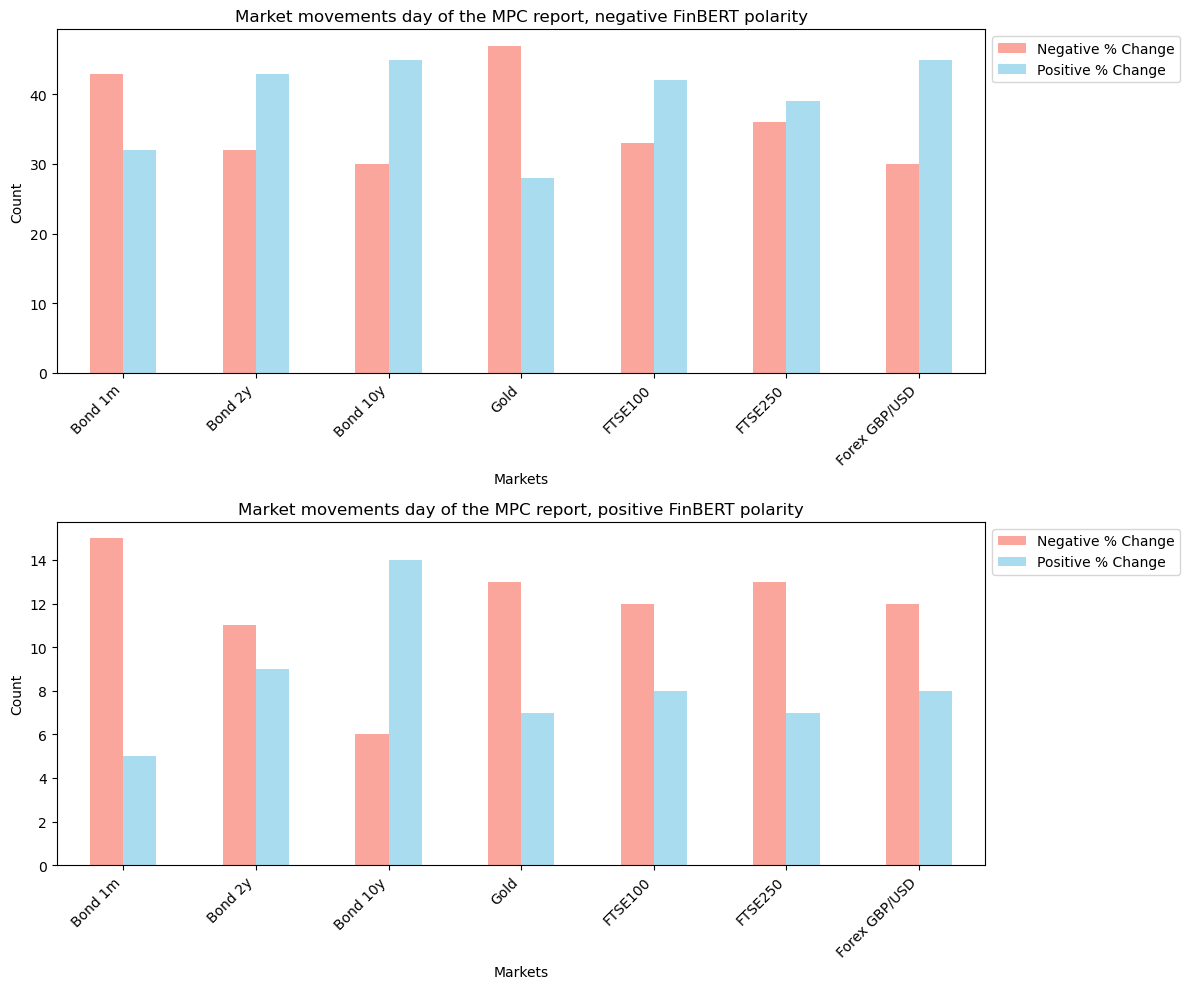

In [42]:
# Define the columns of interest
columns_of_interest = ['bond_1m %', 'bond_2y %', 'bond_10y %', 'gold %', 'ftse100 %', 'ftse250 %', 'forex %']
column_labels = ['Bond 1m', 'Bond 2y', 'Bond 10y', 'Gold', 'FTSE100', 'FTSE250', 'Forex GBP/USD']

# Create a new DataFrame with the counts of positive and negative values for each column
negative_polarity_counts = mpc_daily.loc[mpc_daily['mpc_finbert_polarity'] < 0, 
                                                columns_of_interest].apply(lambda x: (x < 0).value_counts())
positive_polarity_counts = mpc_daily.loc[mpc_daily['mpc_finbert_polarity'] >= 0, 
                                                columns_of_interest].apply(lambda x: (x < 0).value_counts())

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot for values below 0
negative_polarity_counts.T.plot(kind='bar', ax=axes[0], color=['salmon', 'skyblue'], alpha=0.7)
axes[0].set_title('Market movements day of the MPC report, negative FinBERT polarity')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Markets')
axes[0].set_xticklabels(column_labels, rotation=45, ha='right')

# Plot for values above 0
positive_polarity_counts.T.plot(kind='bar', ax=axes[1], color=['salmon', 'skyblue'], alpha=0.7)
axes[1].set_title('Market movements day of the MPC report, positive FinBERT polarity')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Markets')
axes[1].set_xticklabels(column_labels, rotation=45, ha='right')

# Set legend outside the plot
axes[0].legend(['Negative % Change', 'Positive % Change'], loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(['Negative % Change', 'Positive % Change'], loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

The markets seem to be a lot more negative in positive reports but a big concern for the validity of the results here is the small percentage of the reports that are positive, only 20%. 

I'll look at the FSR reports now.

In [43]:
# Import the fsr_finbert_scores_final.csv
fsr = pd.read_csv('fsr_finbert_scores_final.csv')

# View the dataframe
fsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  48 non-null     object 
 1   fsr_finbert_polarity  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [44]:
# Convert the date column to datetime
fsr['date'] = pd.to_datetime(fsr['date'])

# View the dataframe
fsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  48 non-null     datetime64[ns]
 1   fsr_finbert_polarity  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 900.0 bytes


In [45]:
fsr.to_csv('fsr.csv', index=False)

In [46]:
# Merge the DataFrames on the 'date' column
fsr_daily = pd.merge(fsr, daily_change, on='date', how='left')

# Filter the DataFrame to include only dates between '1999-01-01' and '2022-10-31'
fsr_daily = fsr_daily[(fsr_daily['date'] >= '1999-01-01') & (fsr_daily['date'] <= '2022-10-31')]

# Drop duplicates from the 'mpc_finbert_polarity' column
fsr_daily.drop_duplicates(subset=['fsr_finbert_polarity'], inplace=True)

# View the dataframe
fsr_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  47 non-null     datetime64[ns]
 1   fsr_finbert_polarity  47 non-null     float64       
 2   gold %                47 non-null     float64       
 3   bond_1m %             47 non-null     float64       
 4   bond_10y %            47 non-null     float64       
 5   bond_2y %             47 non-null     float64       
 6   ftse100 %             47 non-null     float64       
 7   ftse250 %             47 non-null     float64       
 8   forex %               47 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.7 KB


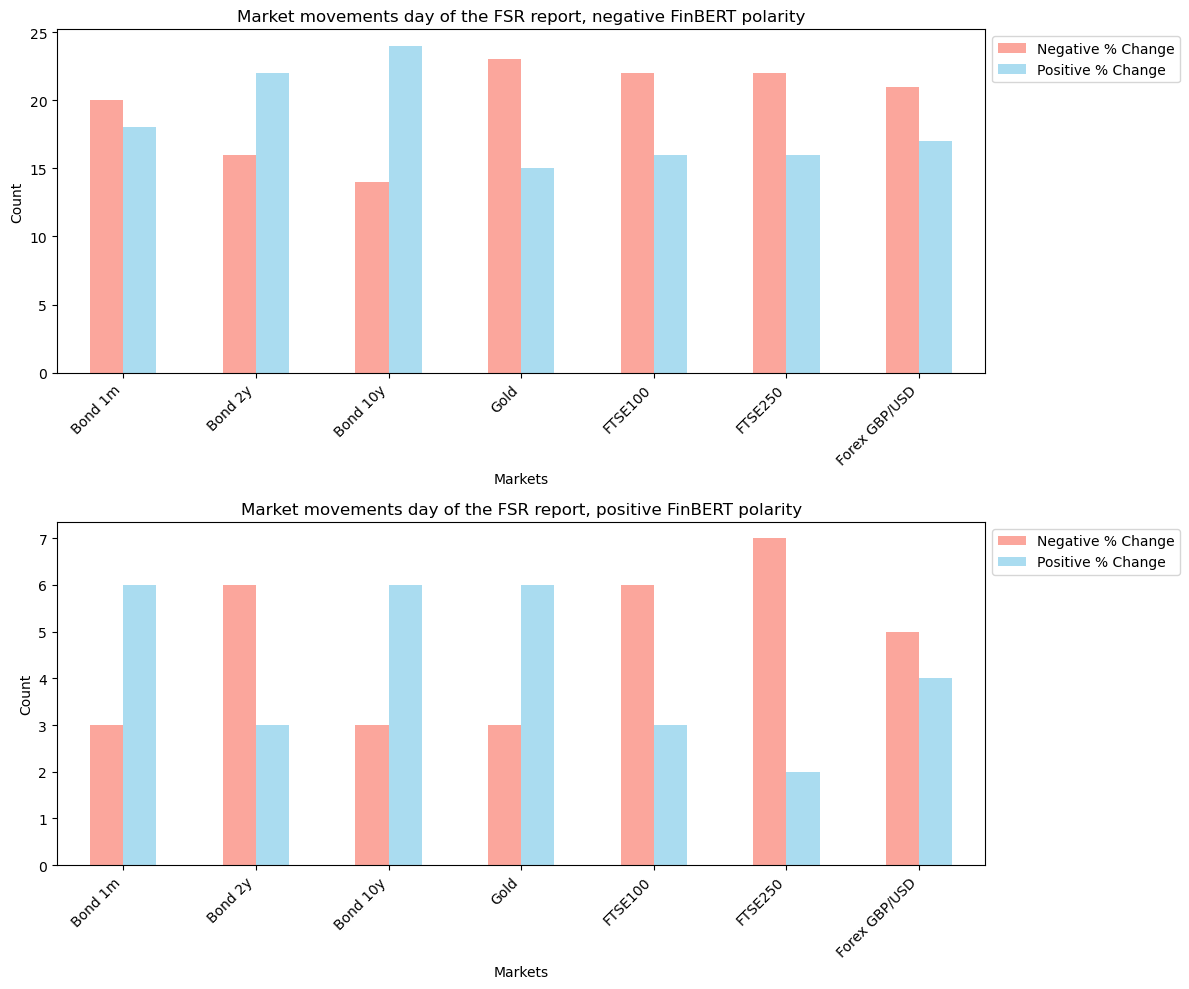

In [47]:
# Define the columns of interest
columns_of_interest = ['bond_1m %', 'bond_2y %', 'bond_10y %', 'gold %', 'ftse100 %', 'ftse250 %', 'forex %']
column_labels = ['Bond 1m', 'Bond 2y', 'Bond 10y', 'Gold', 'FTSE100', 'FTSE250', 'Forex GBP/USD']

# Create a new DataFrame with the counts of positive and negative values for each column
negative_polarity_counts = fsr_daily.loc[fsr_daily['fsr_finbert_polarity'] < 0, 
                                                columns_of_interest].apply(lambda x: (x < 0).value_counts())
positive_polarity_counts = fsr_daily.loc[fsr_daily['fsr_finbert_polarity'] >= 0, 
                                                columns_of_interest].apply(lambda x: (x < 0).value_counts())

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot for values below 0
negative_polarity_counts.T.plot(kind='bar', ax=axes[0], color=['salmon', 'skyblue'], alpha=0.7)
axes[0].set_title('Market movements day of the FSR report, negative FinBERT polarity')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Markets')
axes[0].set_xticklabels(column_labels, rotation=45, ha='right')

# Plot for values above 0
positive_polarity_counts.T.plot(kind='bar', ax=axes[1], color=['salmon', 'skyblue'], alpha=0.7)
axes[1].set_title('Market movements day of the FSR report, positive FinBERT polarity')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Markets')
axes[1].set_xticklabels(column_labels, rotation=45, ha='right')

# Set legend outside the plot
axes[0].legend(['Negative % Change', 'Positive % Change'], loc='upper left', bbox_to_anchor=(1, 1))
axes[1].legend(['Negative % Change', 'Positive % Change'], loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

Again the same concerns as with the MPC but even more so with even fewer positive reports and even fewer reports as a whole making this a potential dead end due to such a small data set.

Confirming the counts of both reports and their polarities.

In [48]:
# MPC reports
positive_count = (mpc_daily['mpc_finbert_polarity'] > 0).sum()
negative_count = (mpc_daily['mpc_finbert_polarity'] < 0).sum()

print("Positive count:", positive_count)
print("Negative count:", negative_count)

Positive count: 20
Negative count: 75


In [49]:
# FSR reports
positive_count = (fsr_daily['fsr_finbert_polarity'] > 0).sum()
negative_count = (fsr_daily['fsr_finbert_polarity'] < 0).sum()

print("Positive count:", positive_count)
print("Negative count:", negative_count)

Positive count: 9
Negative count: 38


A look at the reports and speeches over time.
A lot more speeches and  more positive ones at the latter end of the time frame. This coincides with Mark Carney taking over as Governor from Mervyn King. 
A point worth noting.

The template used in other presentation plots with the periods of interest and key dates was used.

The Governor speeches at a monthly average

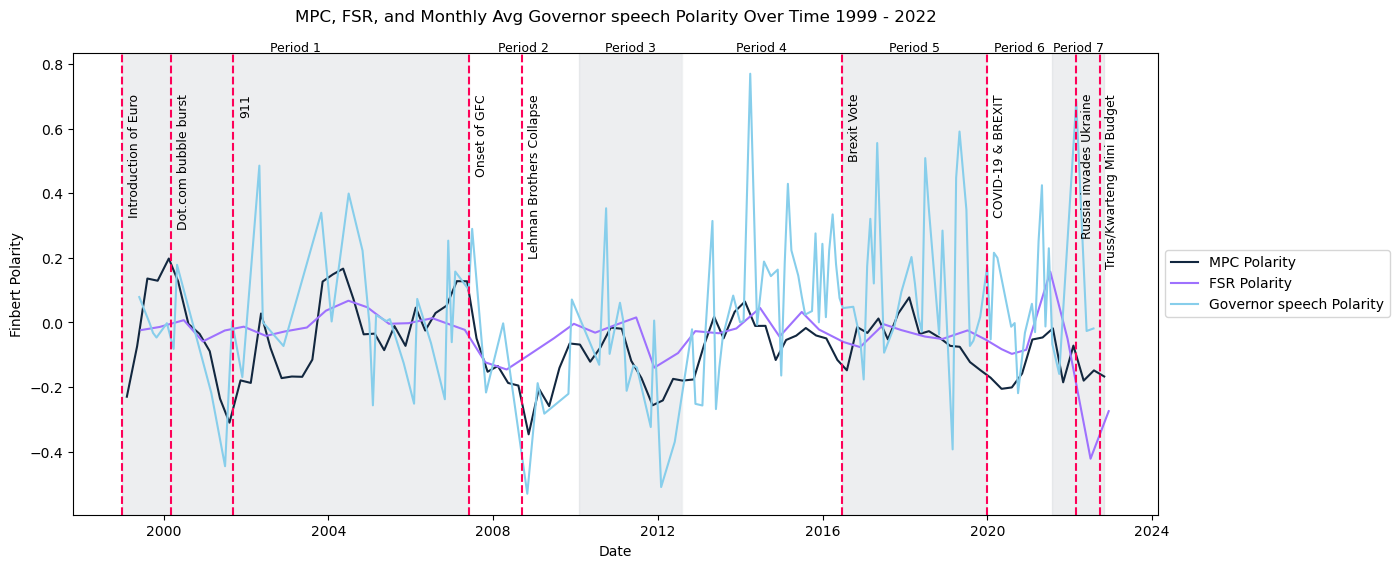

In [50]:
# Calculate monthly averages for 'finbert_polarity' in 'speech_day' DataFrame
speech_day['date'] = pd.to_datetime(speech_day['date'])  # Ensure 'date' column is in datetime format
monthly_avg_finbert_polarity = speech_day.resample('M', on='date')['finbert_polarity'].mean().reset_index()

# Define the periods
periods = [
    ("Period 1", "1999", "2007-06-01"),
    ("Period 2", "2007-06-01", "2010-01-31"),
    ("Period 3", "2010-01-31", "2012-07-31"),
    ("Period 4", "2012-07-31", "2016-06-23"),
    ("Period 5", "2016-06-23", "2019-12-31"),
    ("Period 6", "2020-01-01", "2021-07-30"),
    ("Period 7", "2021-07-30", "2022-10-31")]

# Add key dates with labels
key_dates = {
    "Introduction of Euro": "1999-01-01",
    "Dot.com bubble burst": "2000-03-10",
    "911": "2001-09-11",
    "Onset of GFC": "2007-06-01",
    "Lehman Brothers Collapse": "2008-09-15",
    "Brexit Vote": "2016-06-23",
    "COVID-19 & BREXIT": "2020-01-01",
    "Russia invades Ukraine": "2022-02-24",
    "Truss/Kwarteng Mini Budget": "2022-09-23"}

# Create line plots of mpc_finbert_polarity, fsr_finbert_polarity, and monthly average finbert_polarity
plt.figure(figsize=(14, 6))
mpc_plot = sns.lineplot(data=mpc, x='date',
                        y='mpc_finbert_polarity',
                        color='#12273F',
                        label='MPC Polarity')
fsr_plot = sns.lineplot(data=fsr, x='date',
                        y='fsr_finbert_polarity',
                        color='#9E71FE',
                        label='FSR Polarity')
monthly_avg_plot = sns.lineplot(data=monthly_avg_finbert_polarity, x='date',
                                y='finbert_polarity',
                                color='skyblue',
                                label='Governor speech Polarity')

# Shade and label the periods
for i, (period, start_date, end_date) in enumerate(periods):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    midpoint = start_date + (end_date - start_date) / 2
    color = '#C4C9CE' if i % 2 == 0 else 'white'
    plt.axvspan(start_date, end_date, color=color, alpha=0.3)
    
    # Adjust y-coordinate for all periods
    y_coord = plt.gca().get_ylim()[1] * 1.02  # Move to the top of the plot
    plt.text(midpoint, y_coord, period,
             horizontalalignment='center',
             verticalalignment='center', fontsize=9)

for label, date in key_dates.items():
    date = pd.to_datetime(date)
    plt.axvline(date, color='#FE0158', linestyle='--')
    plt.text(x=date + pd.DateOffset(days=50),
             y=plt.gca().get_ylim()[1] * 0.85,
             s=label, rotation=90,
             verticalalignment='top', fontsize=9)

# Add legend outside
plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5))

# Label plot
plt.xlabel('Date')
plt.ylabel('Finbert Polarity')
plt.title('MPC, FSR, and Monthly Avg Governor speech Polarity Over Time 1999 - 2022',
          y=1.05)

# Save figure
plt.savefig('mpc_fsr_monthly_avg_finbert_polarity_over_time.png',
            bbox_inches='tight')

# Show
plt.show()


Followed by all the speeches at a monthly average.

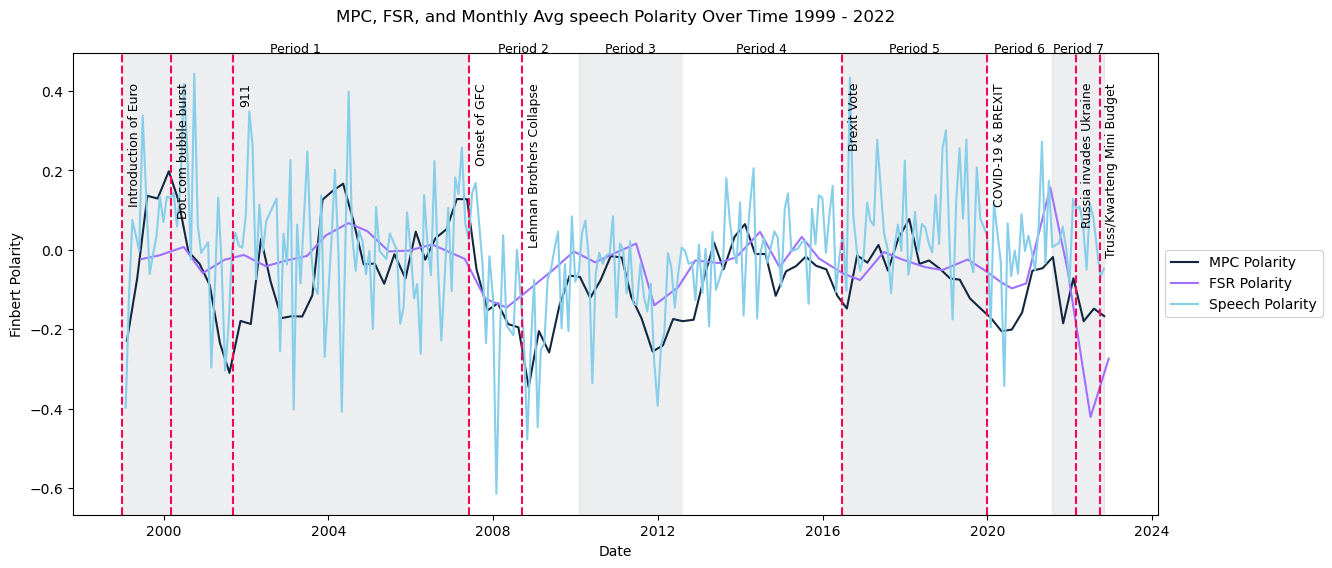

In [51]:
# Calculate monthly averages for 'finbert_polarity' in 'speech_day' DataFrame
# Ensure 'date' column is in datetime format
speeches['date'] = pd.to_datetime(speeches['date'])  
monthly_avg_finbert_polarity = speeches.resample('M', on='date')['finbert_polarity'].mean().reset_index()

# Define the periods
periods = [
    ("Period 1", "1999", "2007-06-01"),
    ("Period 2", "2007-06-01", "2010-01-31"),
    ("Period 3", "2010-01-31", "2012-07-31"),
    ("Period 4", "2012-07-31", "2016-06-23"),
    ("Period 5", "2016-06-23", "2019-12-31"),
    ("Period 6", "2020-01-01", "2021-07-30"),
    ("Period 7", "2021-07-30", "2022-10-31")]

# Add key dates with labels
key_dates = {
    "Introduction of Euro": "1999-01-01",
    "Dot.com bubble burst": "2000-03-10",
    "911": "2001-09-11",
    "Onset of GFC": "2007-06-01",
    "Lehman Brothers Collapse": "2008-09-15",
    "Brexit Vote": "2016-06-23",
    "COVID-19 & BREXIT": "2020-01-01",
    "Russia invades Ukraine": "2022-02-24",
    "Truss/Kwarteng Mini Budget": "2022-09-23"}

# Create line plots of mpc_finbert_polarity, fsr_finbert_polarity, and monthly average finbert_polarity
plt.figure(figsize=(14, 6))
mpc_plot = sns.lineplot(data=mpc, x='date',
                        y='mpc_finbert_polarity',
                        color='#12273F',
                        label='MPC Polarity')
fsr_plot = sns.lineplot(data=fsr, x='date',
                        y='fsr_finbert_polarity',
                        color='#9E71FE',
                        label='FSR Polarity')
monthly_avg_plot = sns.lineplot(data=monthly_avg_finbert_polarity, x='date',
                                y='finbert_polarity',
                                color='skyblue',
                                label='Speech Polarity')

# Shade and label the periods
for i, (period, start_date, end_date) in enumerate(periods):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    midpoint = start_date + (end_date - start_date) / 2
    color = '#C4C9CE' if i % 2 == 0 else 'white'
    plt.axvspan(start_date, end_date, color=color, alpha=0.3)
    
    # Adjust y-coordinate for all periods
    y_coord = plt.gca().get_ylim()[1] * 1.02  # Move to the top of the plot
    plt.text(midpoint, y_coord, period,
             horizontalalignment='center',
             verticalalignment='center', fontsize=9)

for label, date in key_dates.items():
    date = pd.to_datetime(date)
    plt.axvline(date, color='#FE0158', linestyle='--')
    plt.text(x=date + pd.DateOffset(days=50),
             y=plt.gca().get_ylim()[1] * 0.85,
             s=label, rotation=90,
             verticalalignment='top', fontsize=9)

# Add legend outside
plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5))

# Label plot
plt.xlabel('Date')
plt.ylabel('Finbert Polarity')
plt.title('MPC, FSR, and Monthly Avg speech Polarity Over Time 1999 - 2022',
          y=1.05)

# Save figure
plt.savefig('mpc_fsr_monthly_avg_finbert_polarity_over_time.png',
            bbox_inches='tight')

# Show
plt.show()

The Governor's speech plot certainly looks better and with the varying authors, settings, and topics of all the speeches I think that the Governor's speeches are better to show against the reports.

Calculating the amount of speeches and the change in their polarity after Carney took over as Governor.

In [52]:
speech_day_prior_2013 = speech_day[speech_day['date'] < '2013-07-01']
speech_day_after_2013 = speech_day[speech_day['date'] >= '2013-07-01']

# Calculate the average polarity value for each period
average_polarity_prior_2013 = speech_day_prior_2013['finbert_polarity'].mean()
average_polarity_after_2013 = speech_day_after_2013['finbert_polarity'].mean()

# Count the number of entries for each period
count_prior_2013 = speech_day_prior_2013.shape[0]
count_after_2013 = speech_day_after_2013.shape[0]

# Print the average polarity values and counts
print("Average polarity value prior Carney:", average_polarity_prior_2013)
print("Count prior to Carney:", count_prior_2013)
print("Average polarity value after Carney:", average_polarity_after_2013)
print("Count after Carney:", count_after_2013)

Average polarity value prior Carney: -0.040978985093333344
Count prior to Carney: 75
Average polarity value after Carney: 0.14212910173333335
Count after Carney: 105


## Conclusions of the reports and their correlation with speeches

The speeches in loosely follow the MPC report polarity, especially in the earlier years up until 2013. After this speech polarity also appears to take a more positive tone coinciding with Mark Carney becoming Governor.
This, when calculated showed a change from an average polarity of -0.04 to 0.14 but it also shows a large variance in speech sentiment even shown as the monthly average. 
This variance was even more pronounced when looking at all speeches. One caveat is that regardless of who is making a speech, the sentiment is also going to be influenced by the economic climate at the time, the audience, and the nature of the speech.
Additionally, the alignment between the 2 reports also became closer in these latter years creating a more uniform narrative.
Lastly, FSR reports can also be observed to be a lot more neutral throughout the time than the MPC reports with the exception being at the end of the Covid period and after the Russian invasion of Ukraine. 
But overall, they both have a general correlation showing they are broadly in line, if the speeches were to align more, then this would create a far more united front and send a more consistent message.
